In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mosaic24-ps1/sample_submission.csv
/kaggle/input/mosaic24-ps1/train.csv
/kaggle/input/mosaic24-ps1/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/mosaic24-ps1/train.csv")
test = pd.read_csv("/kaggle/input/mosaic24-ps1/test.csv")

In [3]:
train.head()

Id        Date         Open         High          Low        Close  \
0   0  2033-03-01   159.271109   167.221488   157.380478   161.915062   
1   1  2033-03-01   114.571843   114.409664   112.921505   113.066659   
2   2  2033-03-01    50.984499    51.262529    50.266272    50.094499   
3   3  2033-03-01    98.585428    99.988079    97.867719    98.811966   
4   4  2033-03-01  8874.646107  8935.704765  8811.247764  8873.173069   

     Adj Close    Volume    Company  
0   160.167043  40490589  Company_0  
1    87.844722   8592865  Company_1  
2    49.329834  25085661  Company_2  
3    91.784469    823271  Company_3  
4  8407.389386    609369  Company_4

In [4]:
train.describe

<bound method NDFrame.describe of         Id        Date         Open         High          Low        Close  \
0        0  2033-03-01   159.271109   167.221488   157.380478   161.915062   
1        1  2033-03-01   114.571843   114.409664   112.921505   113.066659   
2        2  2033-03-01    50.984499    51.262529    50.266272    50.094499   
3        3  2033-03-01    98.585428    99.988079    97.867719    98.811966   
4        4  2033-03-01  8874.646107  8935.704765  8811.247764  8873.173069   
...    ...         ...          ...          ...          ...          ...   
7411  7411  2038-02-28   104.074758   104.325097   102.299154   102.070115   
7412  7412  2038-02-28     6.825210     7.378966     6.536319     6.484569   
7413  7413  2038-02-28    96.702497   102.527327    96.123058   101.977618   
7414  7414  2038-02-28  8650.533559  8709.103373  8604.908934  8623.897896   
7415  7415  2038-02-28   172.287522   172.895417   169.820142   170.720189   

        Adj Close    Volume  

In [5]:
test.head()

Id        Date    Company
0   0  2038-03-01  Company_0
1   1  2038-03-01  Company_1
2   2  2038-03-01  Company_2
3   3  2038-03-01  Company_3
4   4  2038-03-01  Company_4

In [6]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 969.1 kB/s eta 0:00:00


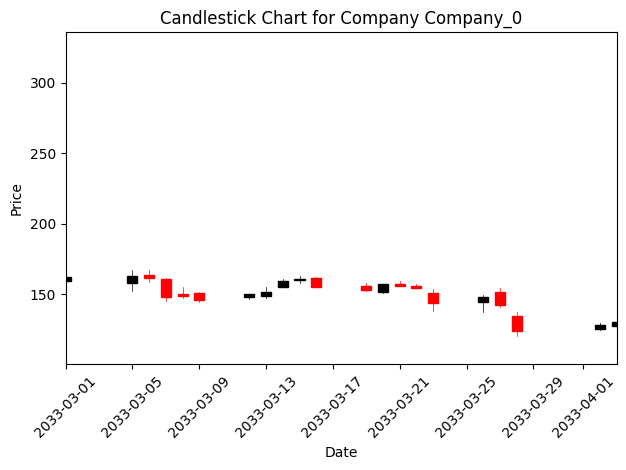

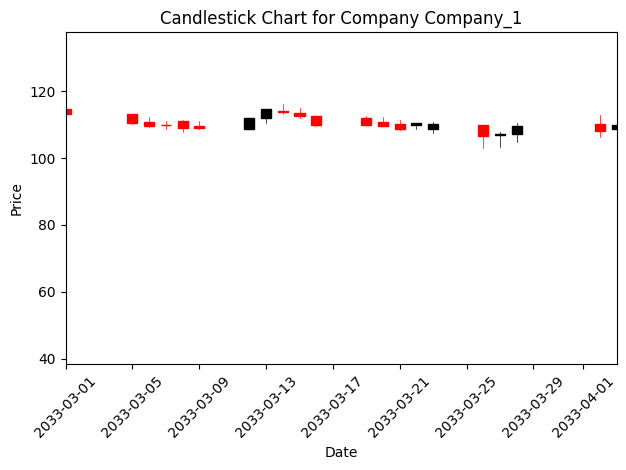

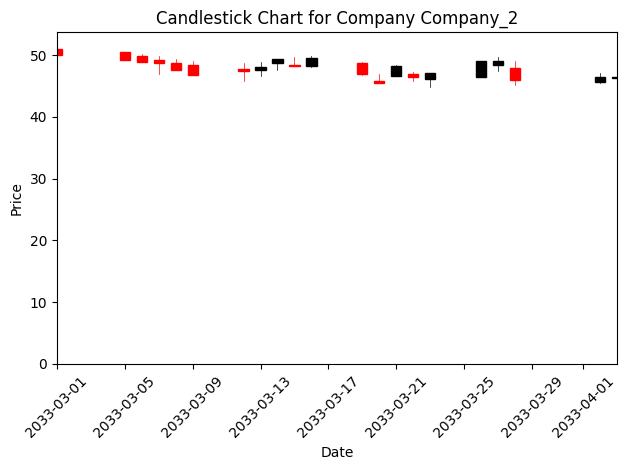

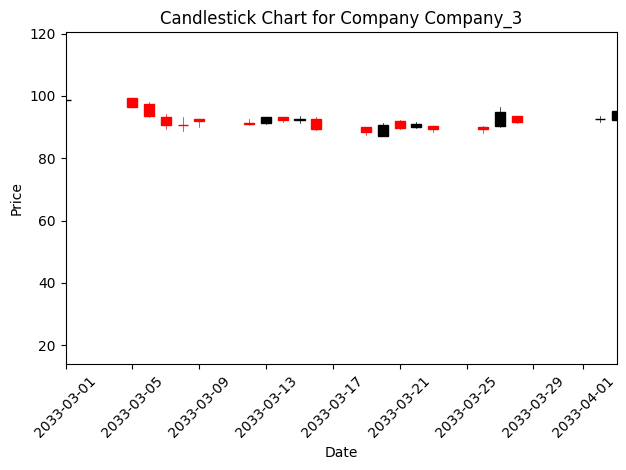

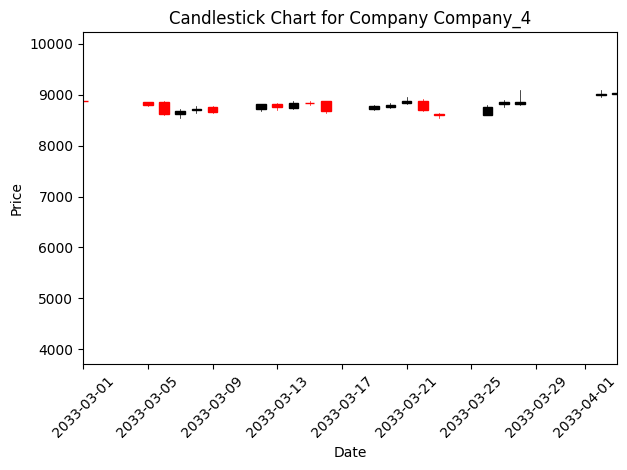

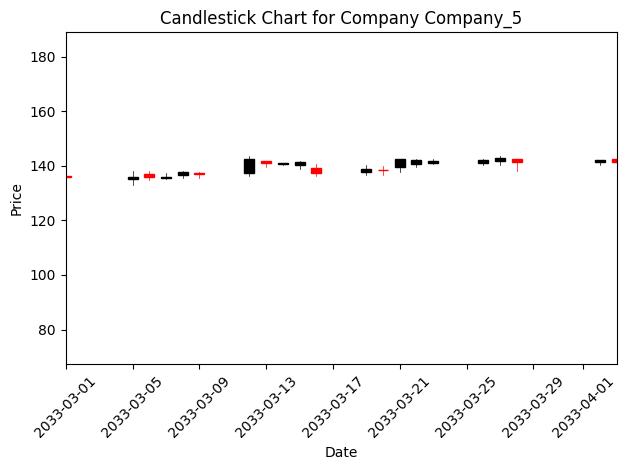

In [7]:

import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
train['Date'] = pd.to_datetime(train['Date'])
for company, group in train.groupby('Company'):
    fig, ax = plt.subplots()
    candlestick_ohlc(ax, zip(mdates.date2num(group['Date']), group['Open'], group['High'], group['Low'], group['Close']), width=0.6)
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.title(f'Candlestick Chart for Company {company}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    date_range = pd.date_range(start='2033-03-01', end='2033-04-03')  # Example: from 2033-03-01 to 2033-03-03
    ax.set_xlim([date_range[0], date_range[-1]])  # Set the x-axis limits to the specified date range
    plt.tight_layout()
    plt.show()

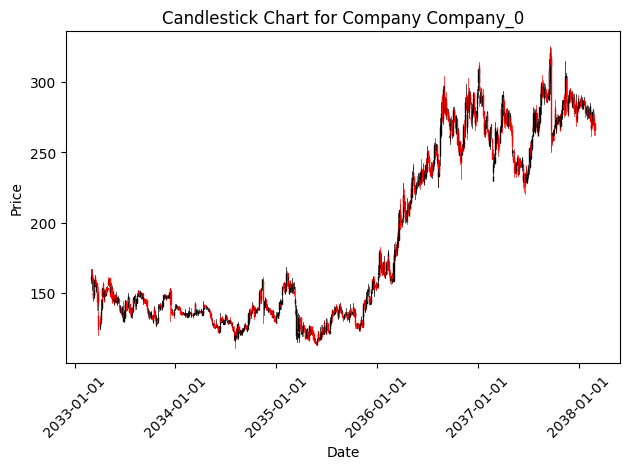

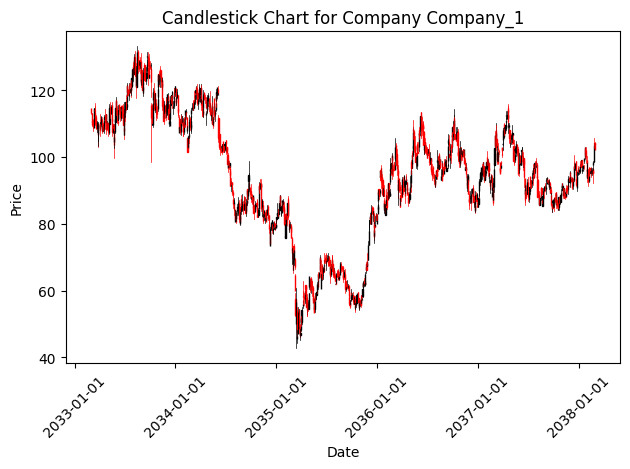

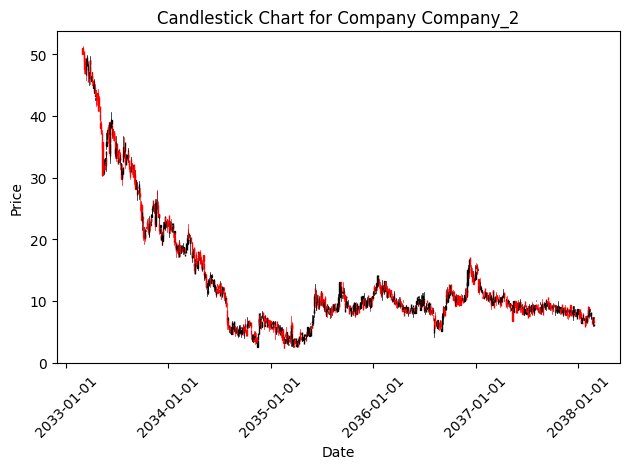

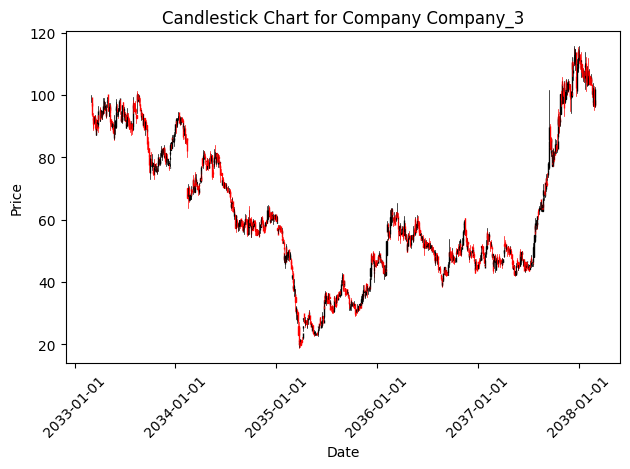

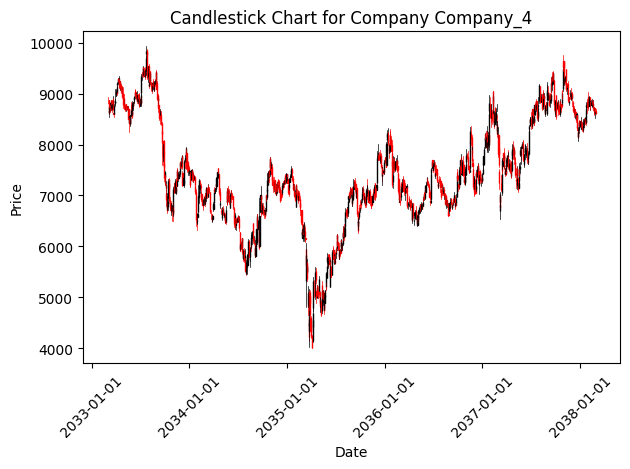

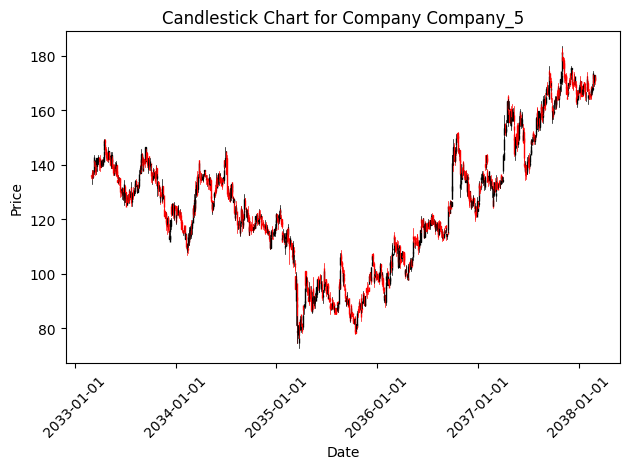

In [8]:

train['Date'] = pd.to_datetime(train['Date'])
for company, group in train.groupby('Company'):
    fig, ax = plt.subplots()
    candlestick_ohlc(ax, zip(mdates.date2num(group['Date']), group['Open'], group['High'], group['Low'], group['Close']), width=0.6)
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.title(f'Candlestick Chart for Company {company}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
#     date_range = pd.date_range(start='2033-03-01', end='2033-04-03')  # Example: from 2033-03-01 to 2033-03-03
#     ax.set_xlim([date_range[0], date_range[-1]])  # Set the x-axis limits to the specified date range
    plt.tight_layout()
    plt.show()

In [9]:
for company, group in train.groupby('Company'):
    print(f"Company {company} Summary Statistics:")
    print(group.describe())
    print()

Company Company_0 Summary Statistics:
                Id                           Date         Open         High  \
count  1236.000000                           1236  1236.000000  1236.000000   
mean   3705.000000  2035-09-03 19:18:03.495145728   187.566650   190.696889   
min       0.000000            2033-03-01 00:00:00   113.779609   114.824866   
25%    1852.500000            2034-06-06 18:00:00   135.337998   137.051820   
50%    3705.000000            2035-09-05 12:00:00   151.307124   153.591069   
75%    5557.500000            2036-12-03 18:00:00   256.712903   261.515165   
max    7410.000000            2038-02-28 00:00:00   320.651894   325.074693   
std    2141.680648                            NaN    62.869524    64.038775   

               Low        Close    Adj Close        Volume  
count  1236.000000  1236.000000  1236.000000  1.236000e+03  
mean    184.442784   187.377773   186.790059  2.688066e+06  
min     110.832260   113.647274   112.865157  5.524200e+04  
25%   

In [10]:
for company, group in train.groupby('Company'):
    print(f"Company {company} Summary Statistics:")
    print(group.info())
    print()

Company Company_0 Summary Statistics:
<class 'pandas.core.frame.DataFrame'>
Index: 1236 entries, 0 to 7410
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Id         1236 non-null   int64         
 1   Date       1236 non-null   datetime64[ns]
 2   Open       1236 non-null   float64       
 3   High       1236 non-null   float64       
 4   Low        1236 non-null   float64       
 5   Close      1236 non-null   float64       
 6   Adj Close  1236 non-null   float64       
 7   Volume     1236 non-null   int64         
 8   Company    1236 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 96.6+ KB
None

Company Company_1 Summary Statistics:
<class 'pandas.core.frame.DataFrame'>
Index: 1236 entries, 1 to 7411
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Id         1236 no

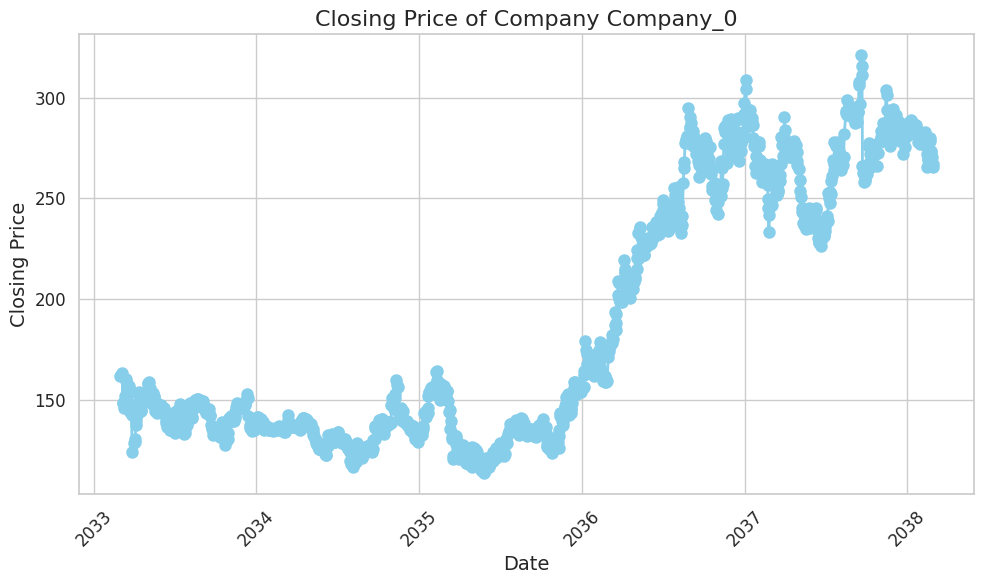

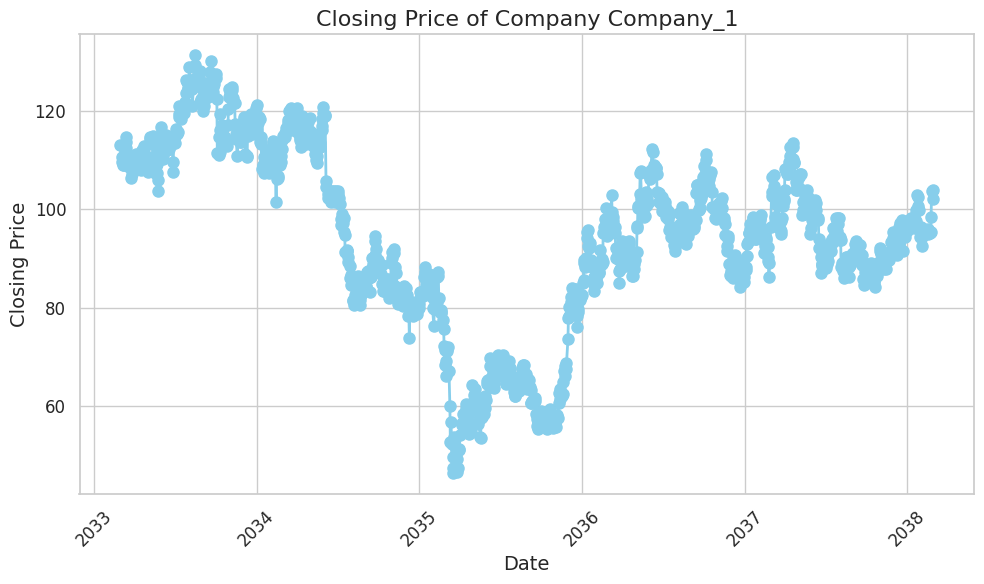

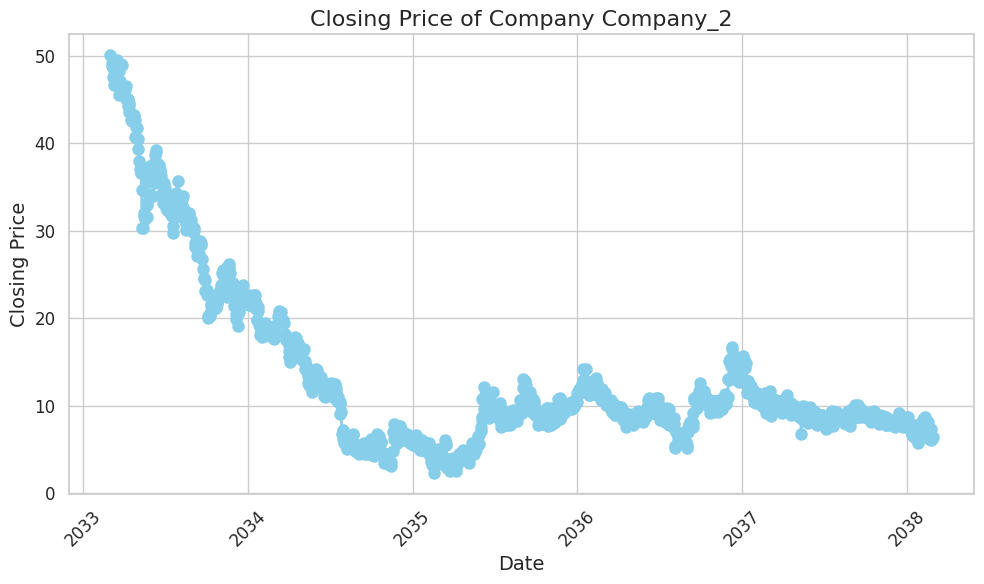

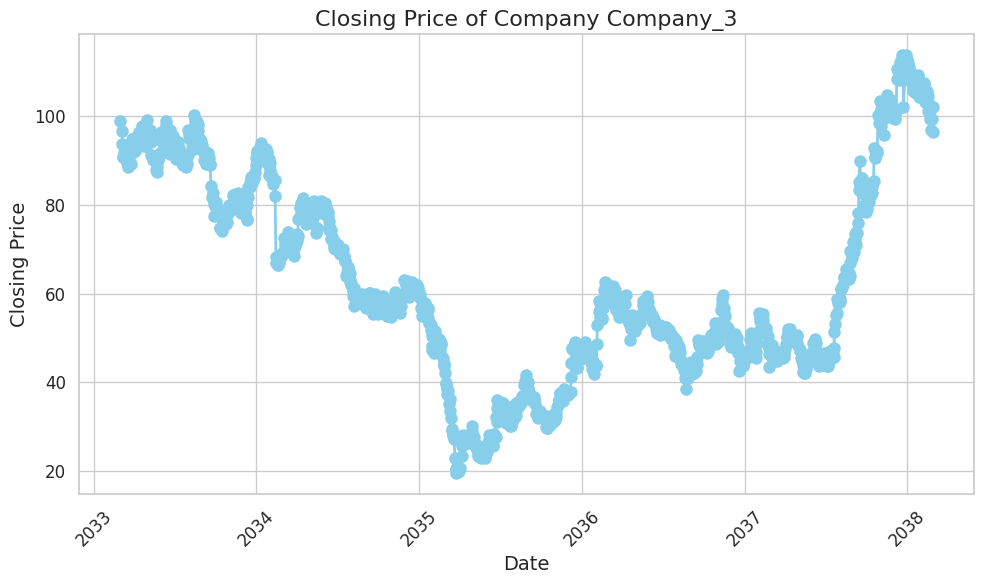

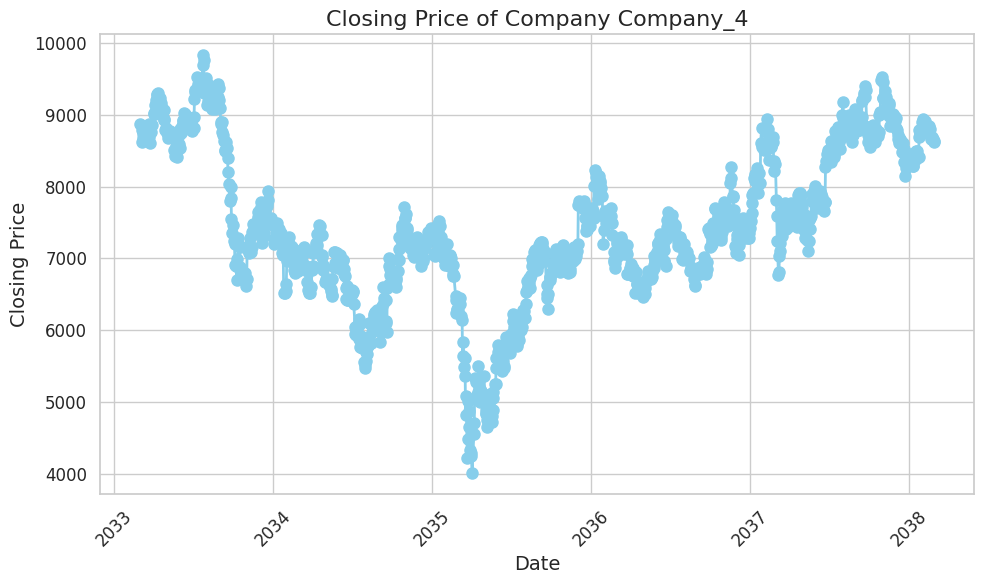

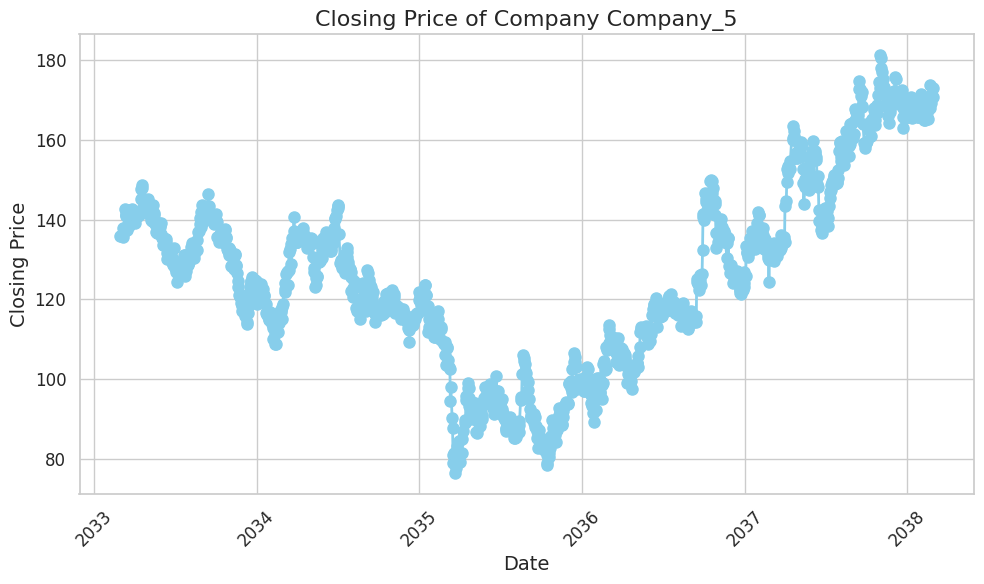

In [11]:
import seaborn as sns  # Import seaborn for enhanced styling

# Set seaborn style
sns.set(style="whitegrid")
# Plot separate graph for the closing price of each company with enhanced styling
for company, group in train.groupby('Company'):
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.plot(group['Date'], group['Close'], color='skyblue', marker='o', linestyle='-', linewidth=2, markersize=8)
    plt.title(f'Closing Price of Company {company}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Closing Price', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels and adjust font size
    plt.yticks(fontsize=12)  # Adjust font size of y-axis labels
    plt.grid(True)  # Add grid lines
    plt.tight_layout()
    plt.show()

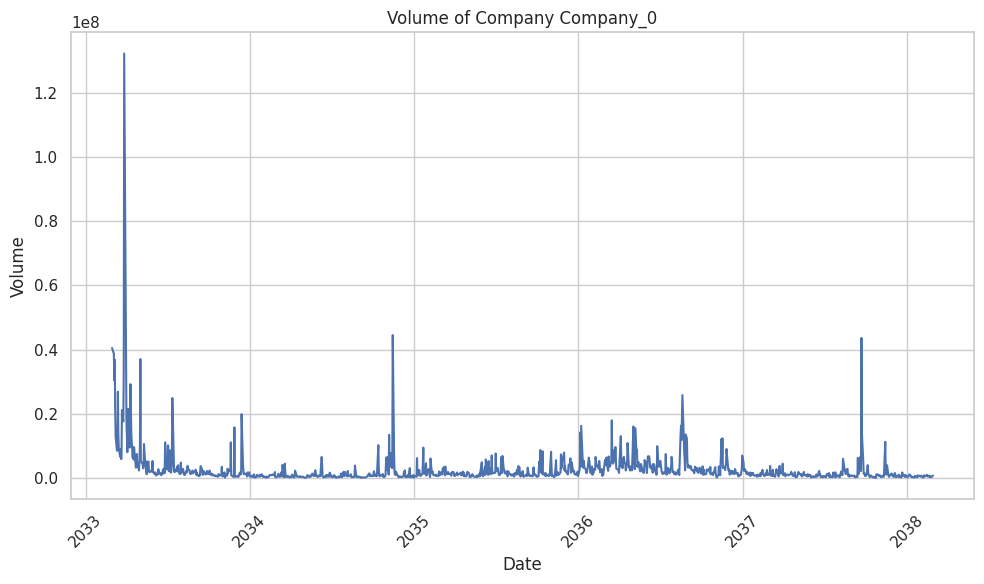

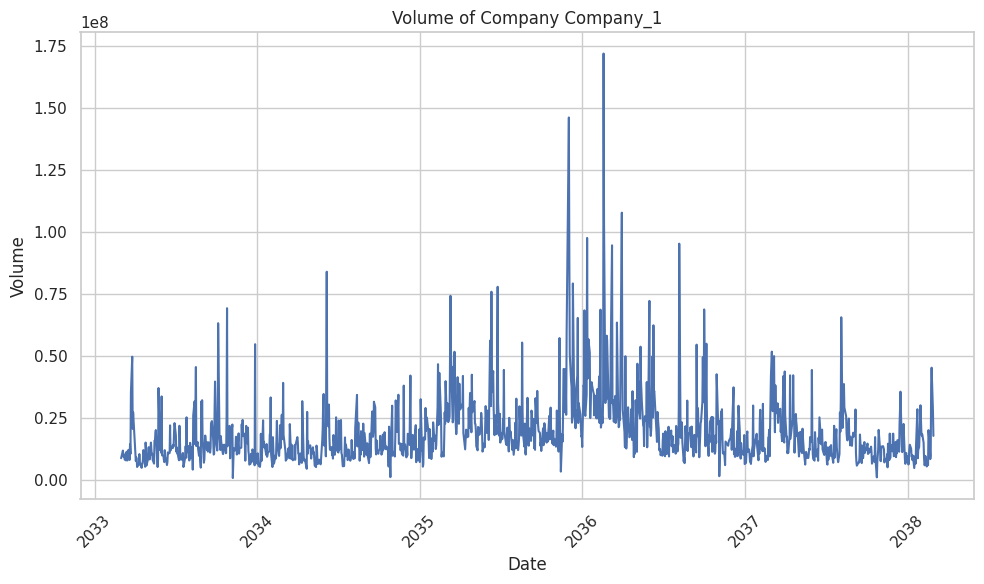

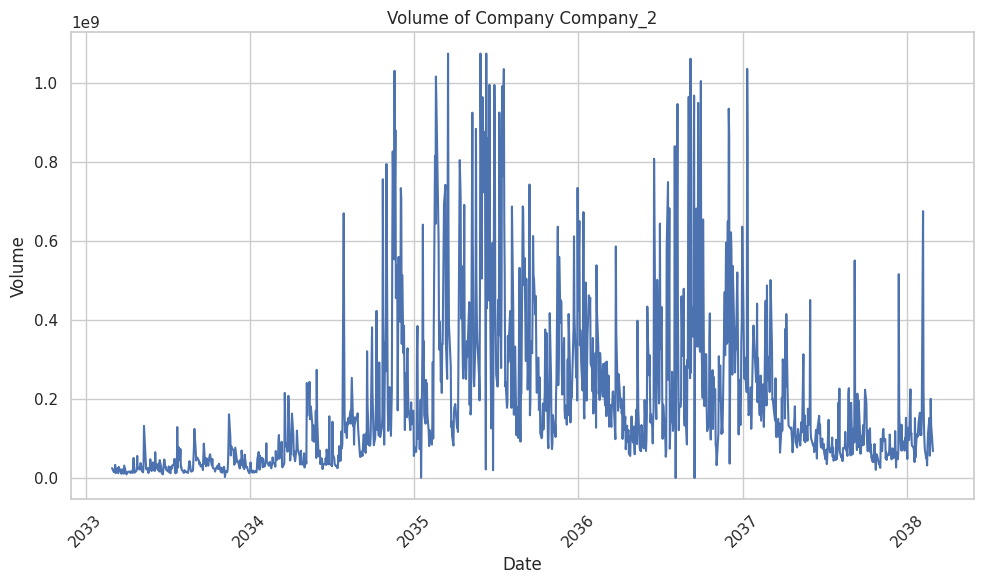

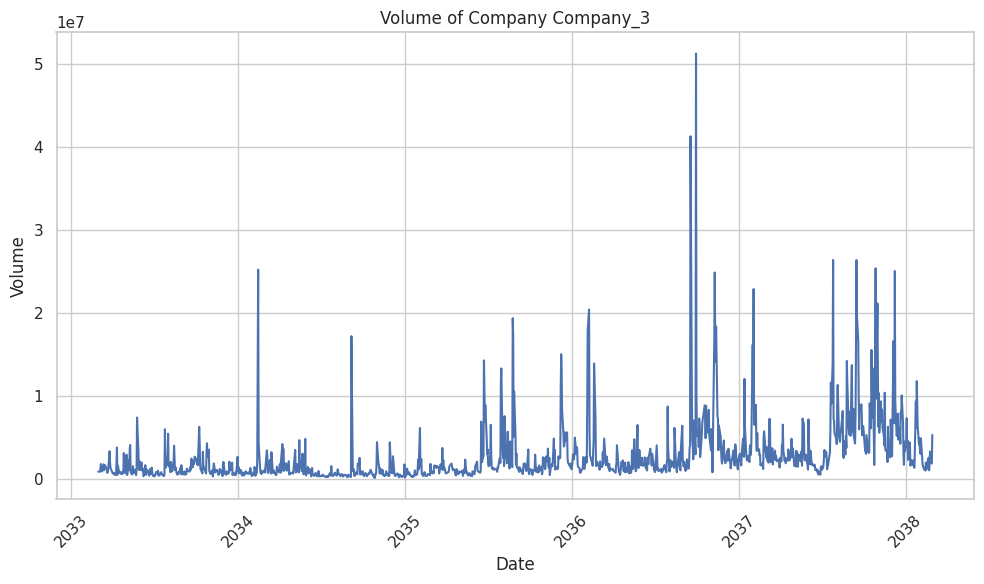

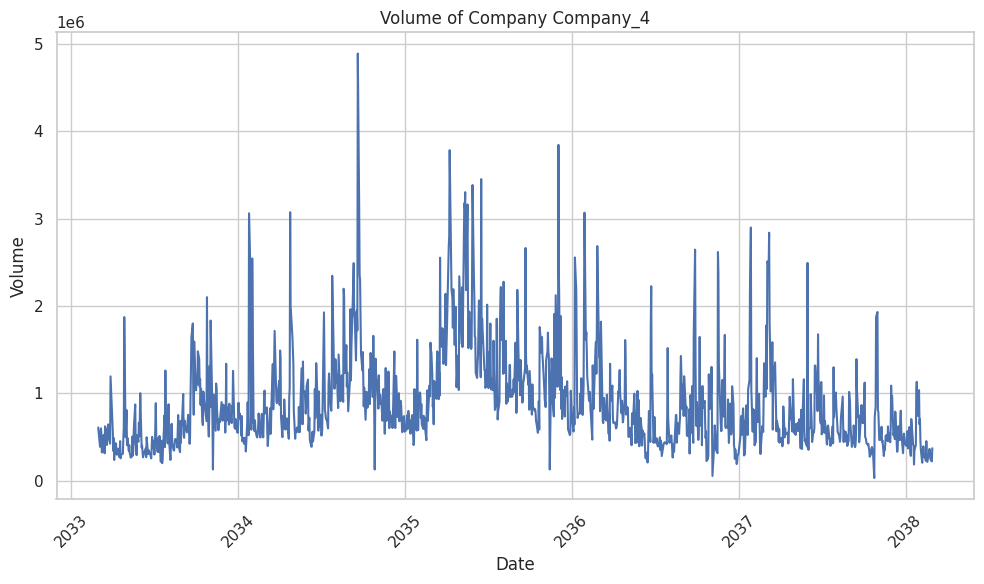

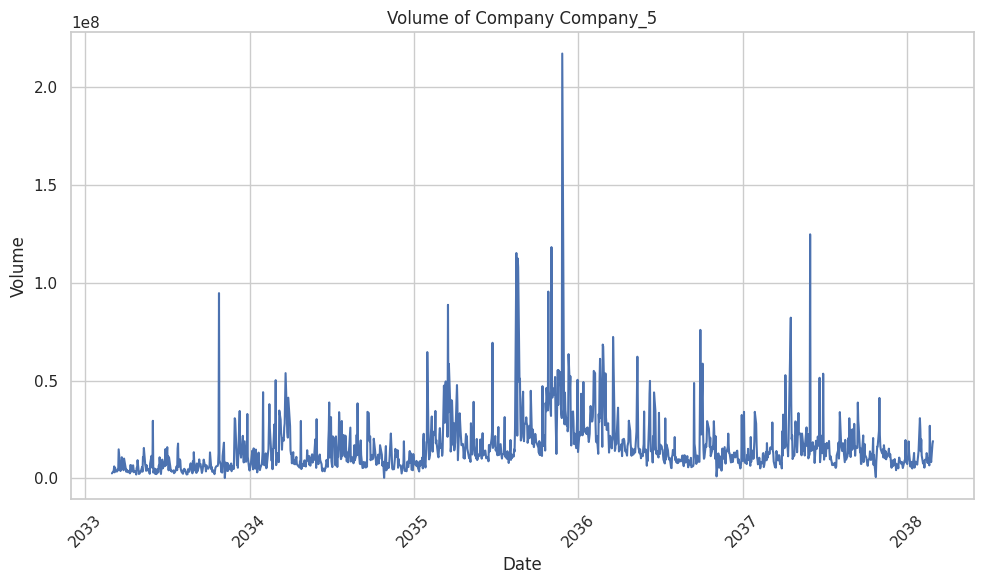

In [12]:
# Set seaborn style
sns.set(style="whitegrid")
# Plot separate graph for the closing price of each company with enhanced styling
# Plot separate graph for the closing price of each company
for company, group in train.groupby('Company'):
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.plot(group['Date'], group['Volume'])
    plt.title(f'Volume of Company {company}')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

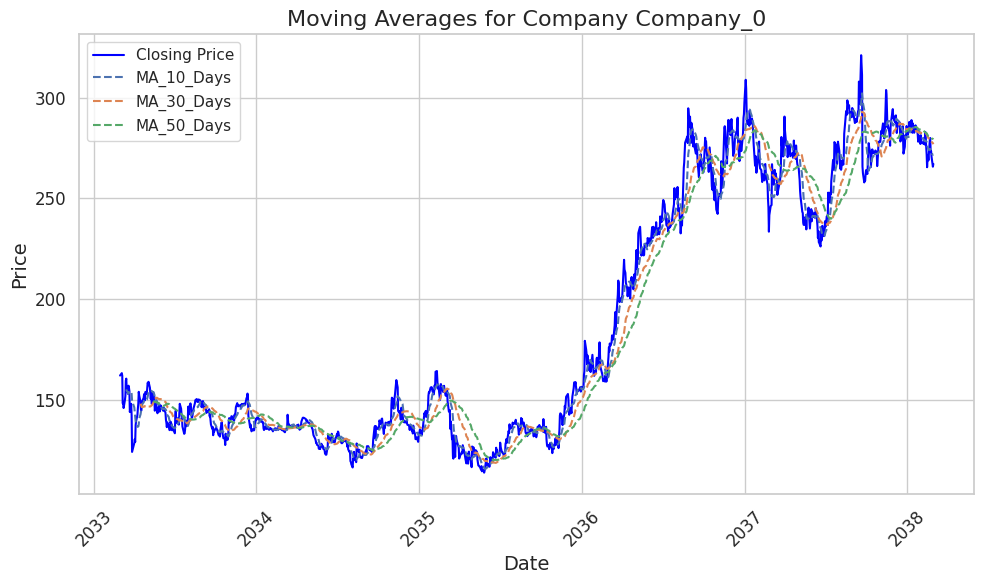

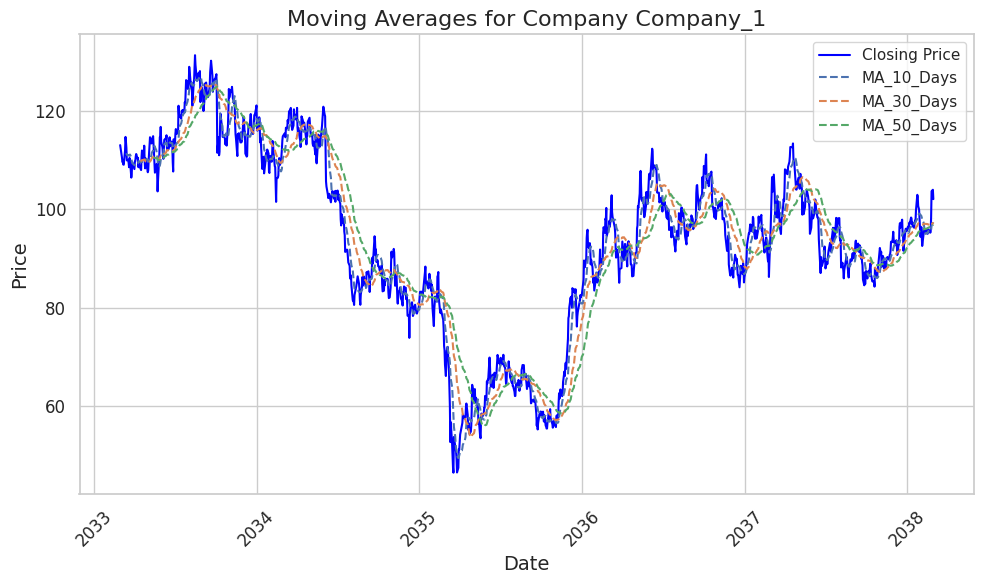

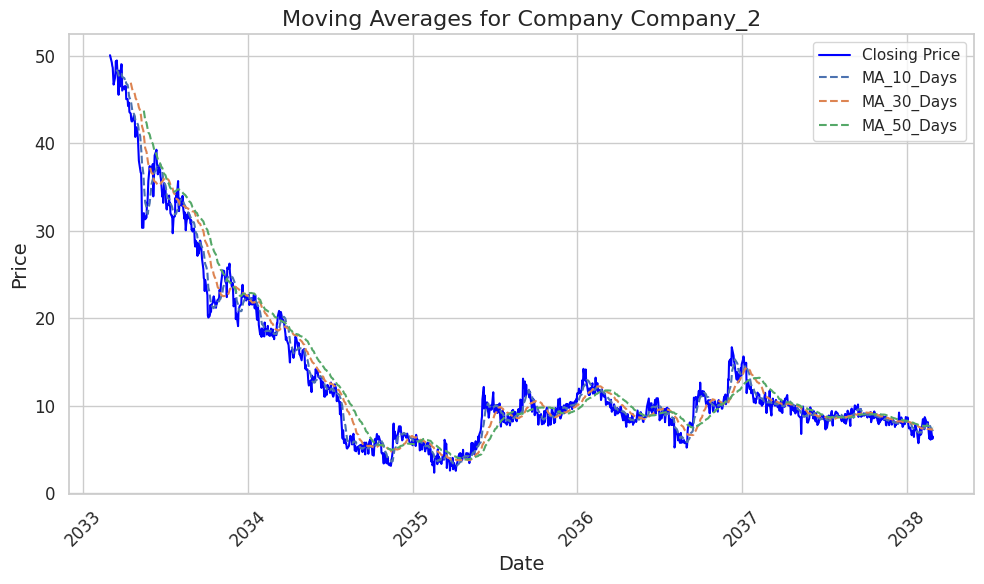

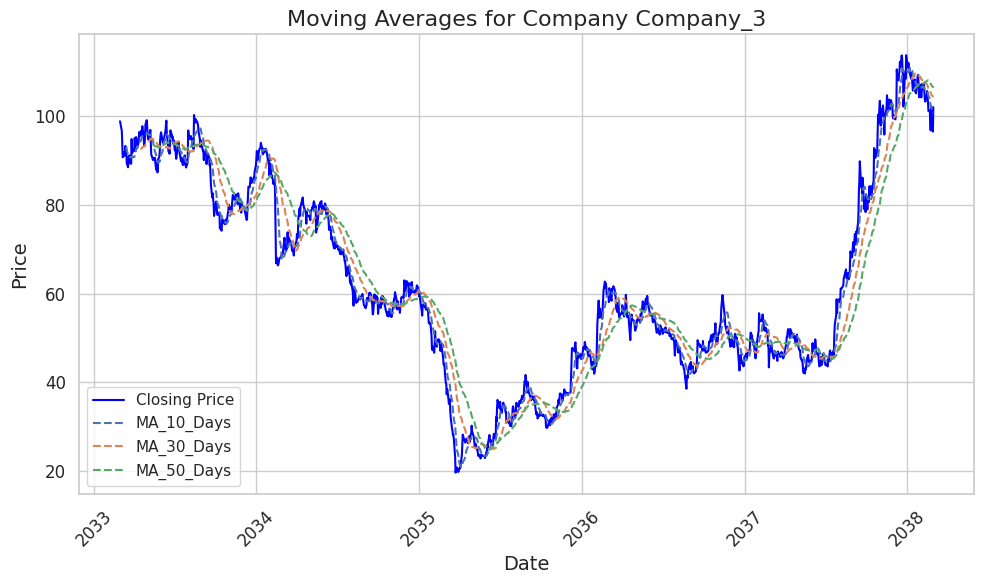

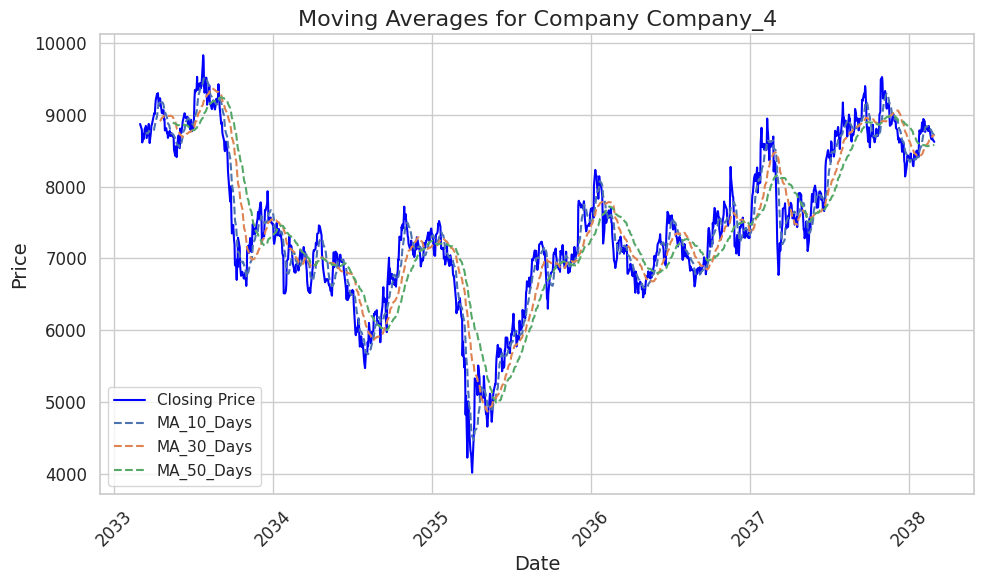

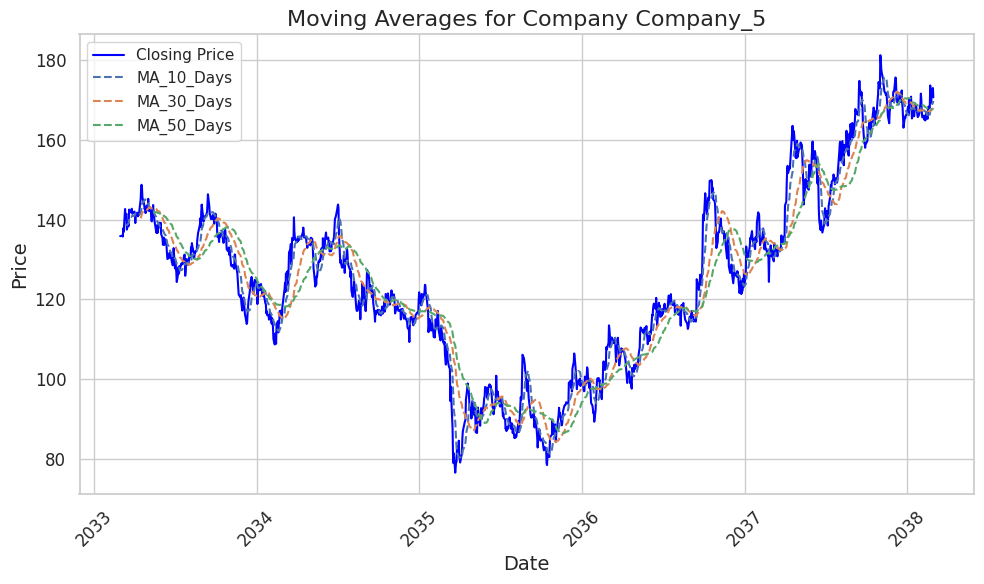

In [13]:
for company, group in train.groupby('Company'):
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.plot(group['Date'], group['Close'], label='Closing Price', color='blue')
    for interval in [10, 30, 50]:
        ma_col_name = f'MA_{interval}_Days'
        group[ma_col_name] = group['Close'].rolling(window=interval).mean()
        plt.plot(group['Date'], group[ma_col_name], label=f'MA_{interval}_Days', linestyle='--')
    
    plt.title(f'Moving Averages for Company {company}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.legend()
    plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels and adjust font size
    plt.yticks(fontsize=12)  # Adjust font size of y-axis labels
    plt.grid(True)  # Add grid lines
    plt.tight_layout()
    plt.show()

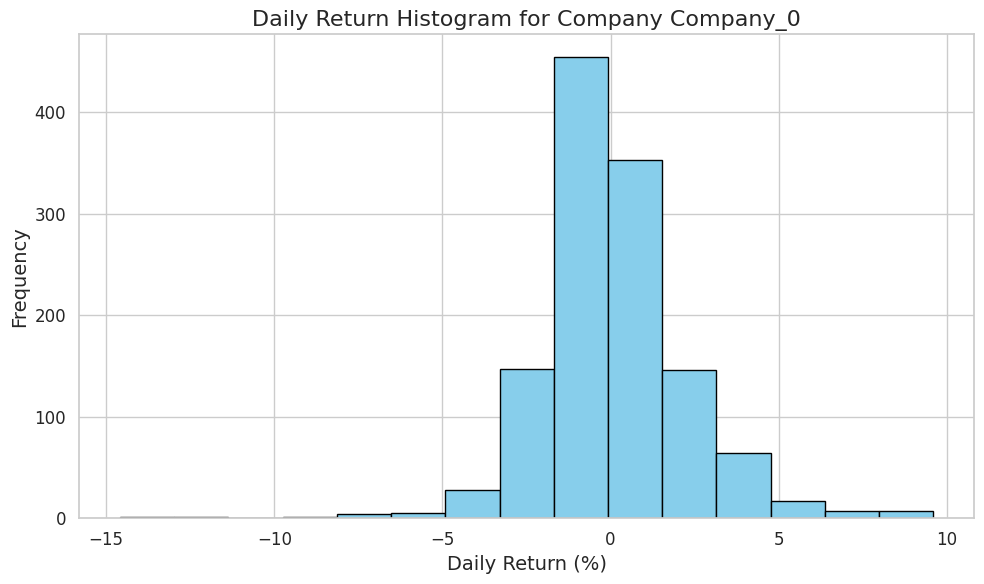

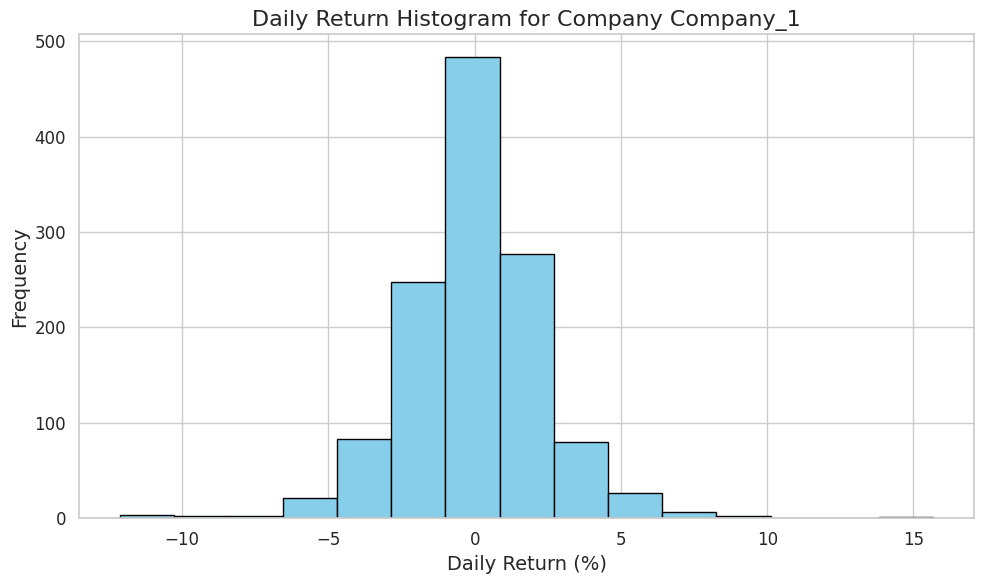

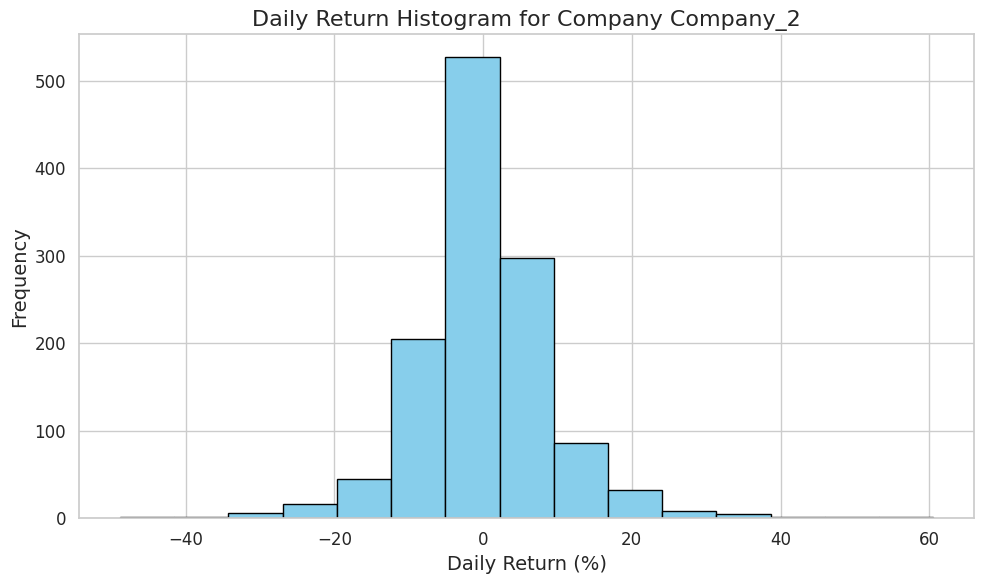

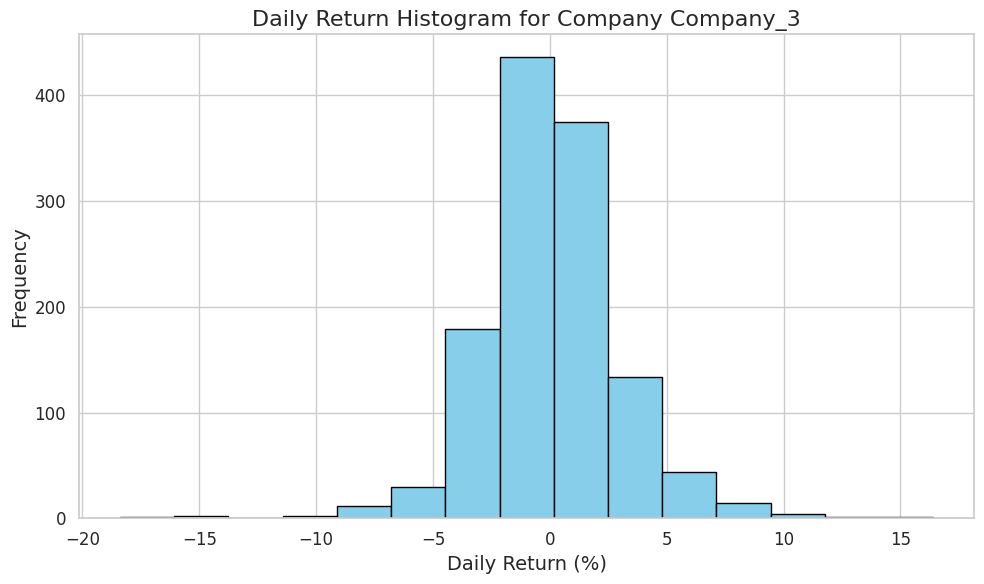

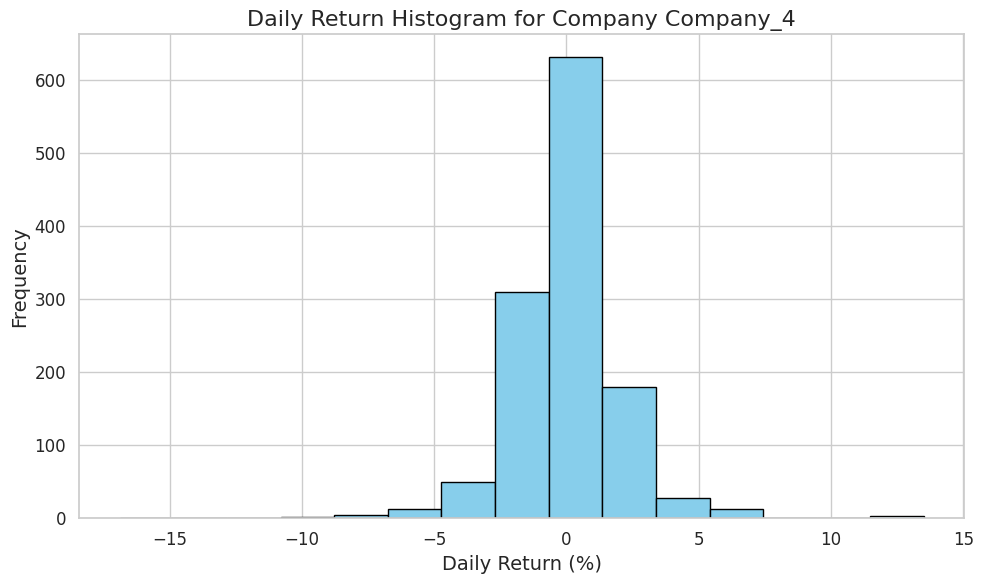

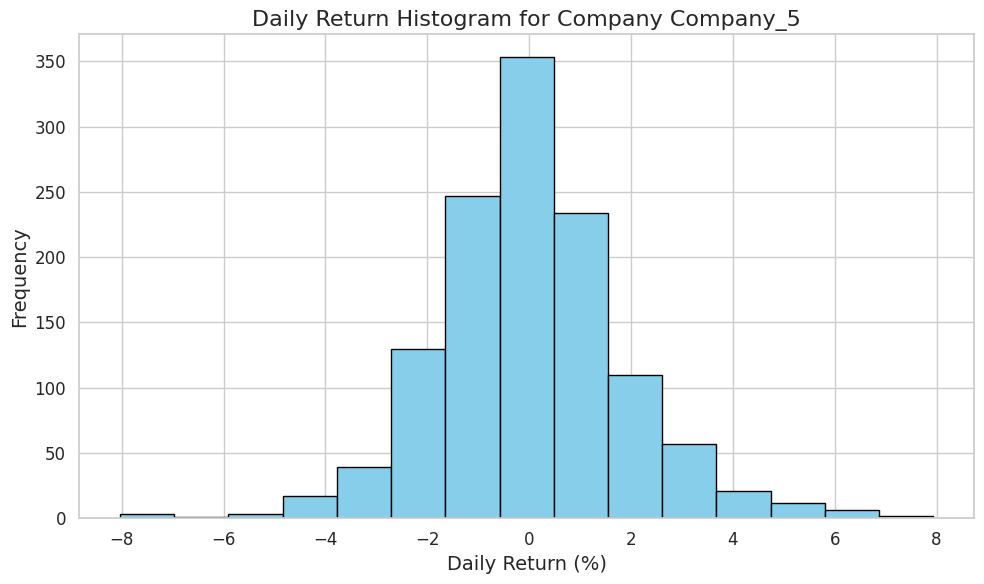

In [14]:
for company, group in train.groupby('Company'):
    group['Daily_Return'] = group['Close'].pct_change() * 100  # Calculate daily return as percentage change
    
    # Plot histogram for daily returns
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.hist(group['Daily_Return'].dropna(), bins=15, color='skyblue', edgecolor='black')
    plt.title(f'Daily Return Histogram for Company {company}', fontsize=16)
    plt.xlabel('Daily Return (%)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)  # Adjust font size of x-axis labels
    plt.yticks(fontsize=12)  # Adjust font size of y-axis labels
    plt.grid(True)  # Add grid lines
    plt.tight_layout()
    plt.show()

In [15]:
company_dfs = {}

# Iterate over unique company names
for company in train['Company'].unique():
    # Filter the DataFrame for the current company
    company_data = train[train['Company'] == company]
    
    company_data = company_data.drop(columns=['Company'])
    
    # Store the filtered data in the dictionary
    company_dfs[company] = company_data
    

# Now company_dfs contains DataFrames for each company
# You can access the DataFrame for a specific company like this:
# company_dfs["Company1"]

# Example usage:
# Print the first few rows of the DataFrame for Company1
print("Data for Company_0:")
print(company_dfs["Company_0"].head())

Data for Company_0:
    Id       Date        Open        High         Low       Close   Adj Close  \
0    0 2033-03-01  159.271109  167.221488  157.380478  161.915062  160.167043   
6    6 2033-03-05  158.049337  167.347904  152.216604  163.108507  162.822481   
12  12 2033-03-06  163.686732  167.057890  158.434401  161.716298  161.443814   
18  18 2033-03-07  160.461622  161.422258  145.216158  148.051907  147.522450   
24  24 2033-03-08  150.289989  154.889808  146.911183  148.483368  147.558481   

      Volume  
0   40490589  
6   38792259  
12  30423475  
18  36866132  
24  20664624  


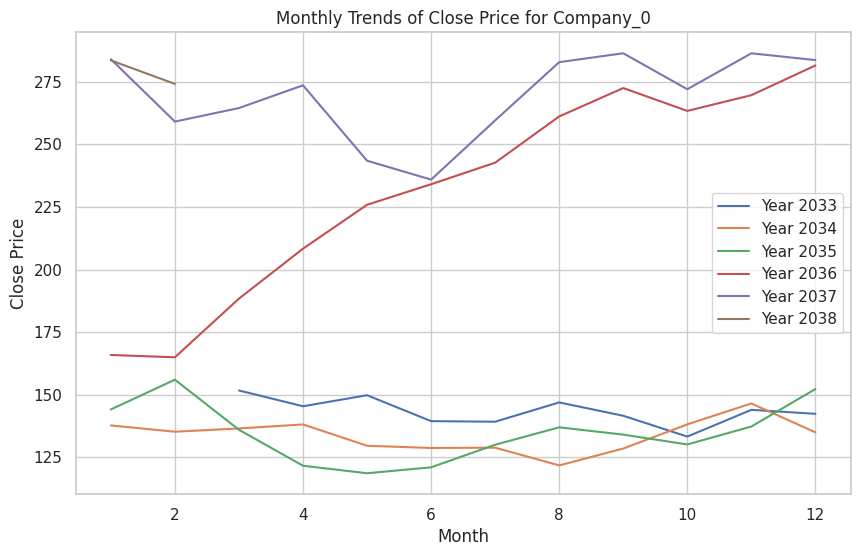

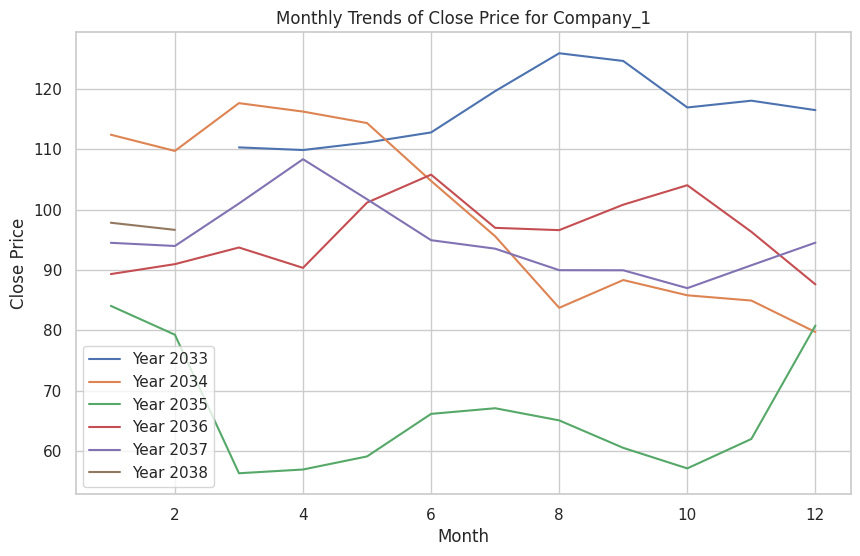

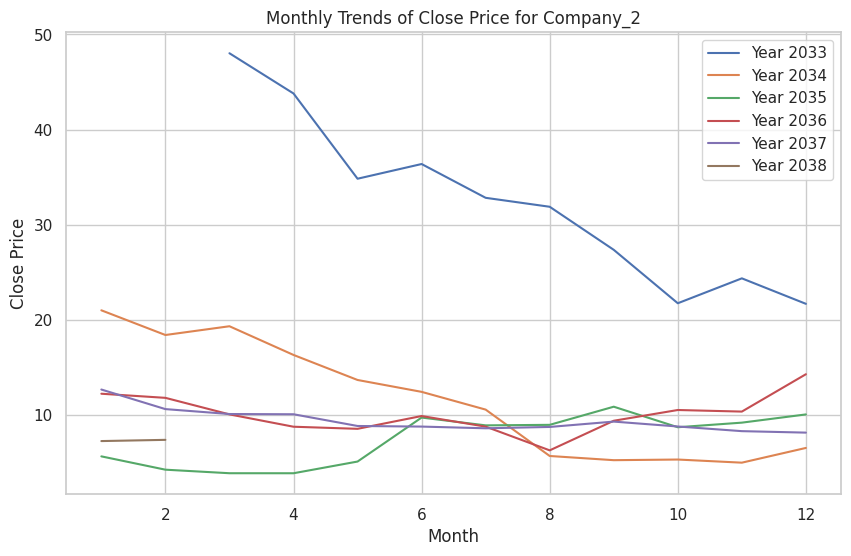

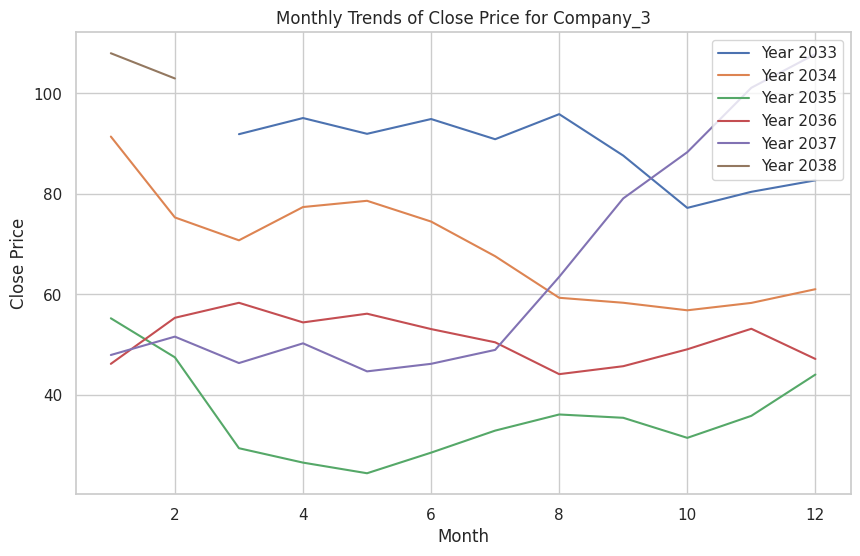

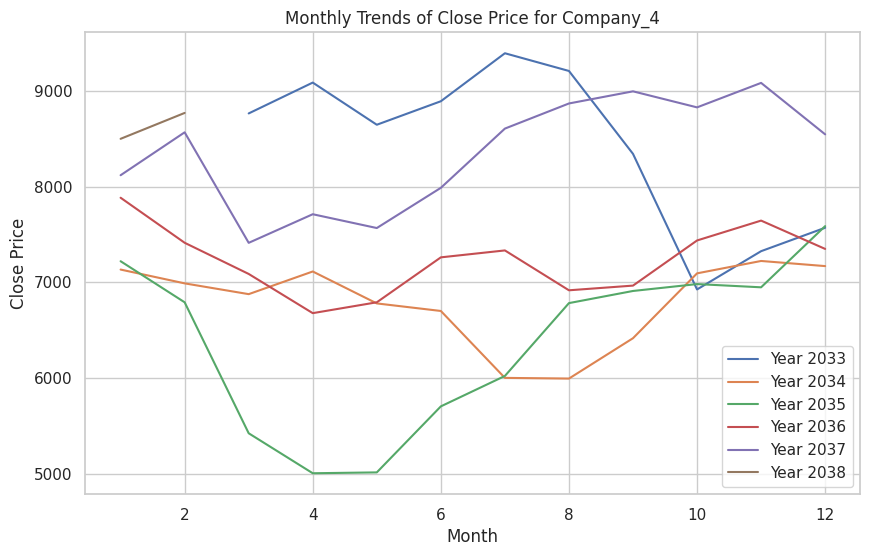

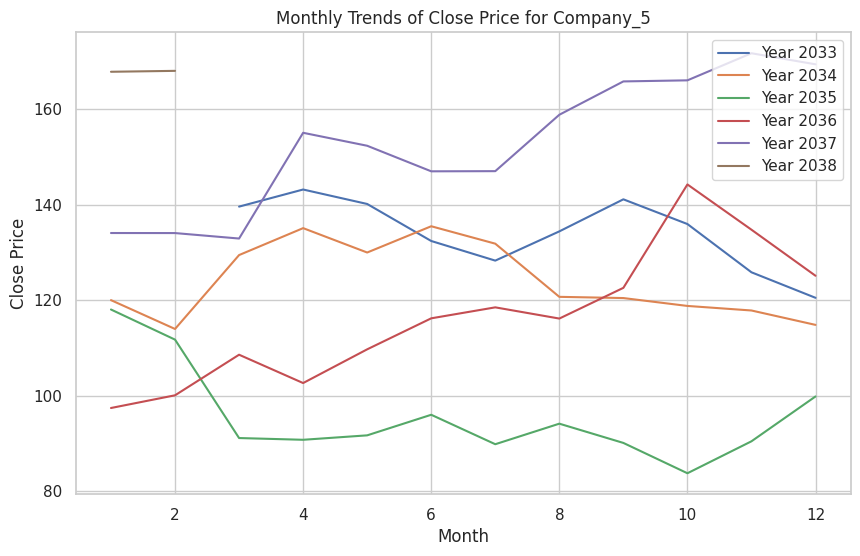

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming company_dataframes is a dictionary containing DataFrames for each company
# Iterate over each company's DataFrame
for company, df in company_dfs.items():
    # Convert the date column to datetime if it's not already
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Extract year and month from the date column
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    
    # Group the data by year and month
    grouped_data = df.groupby(['Year', 'Month'])
    
    # Aggregate the data within each group (e.g., calculate mean, median, sum)
    monthly_trends = grouped_data['Close'].mean()  # Assuming you want to plot the mean of the "Close" column
    
    # Reset index to make Year and Month as columns
    monthly_trends = monthly_trends.reset_index()
    
    # Plot the "Close" column month-wise for each year
    plt.figure(figsize=(10, 6))
    for year in monthly_trends['Year'].unique():
        year_data = monthly_trends[monthly_trends['Year'] == year]
        plt.plot(year_data['Month'], year_data['Close'], label=f'Year {year}')
    
    # Add labels and title
    plt.title(f'Monthly Trends of Close Price for {company}')
    plt.xlabel('Month')
    plt.ylabel('Close Price')
    plt.legend()
    
    # Show plot
    plt.show()


In [17]:
for company in company_dfs:
    print(company_dfs[company].head)

<bound method NDFrame.head of         Id       Date        Open        High         Low       Close  \
0        0 2033-03-01  159.271109  167.221488  157.380478  161.915062   
6        6 2033-03-05  158.049337  167.347904  152.216604  163.108507   
12      12 2033-03-06  163.686732  167.057890  158.434401  161.716298   
18      18 2033-03-07  160.461622  161.422258  145.216158  148.051907   
24      24 2033-03-08  150.289989  154.889808  146.911183  148.483368   
...    ...        ...         ...         ...         ...         ...   
7386  7386 2038-02-22  276.292107  280.003128  271.368847  273.183503   
7392  7392 2038-02-23  275.052974  279.450461  269.396522  273.416583   
7398  7398 2038-02-24  274.586866  276.778935  269.655064  270.560046   
7404  7404 2038-02-27  270.691651  273.296639  262.006661  265.683943   
7410  7410 2038-02-28  267.811704  270.895889  262.338575  267.048830   

       Adj Close    Volume  Year  Month  
0     160.167043  40490589  2033      3  
6     162

In [18]:
!pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.6 MB/s eta 0:00:00


In [19]:
for company, data in company_dfs.items():
    data["Date"] = pd.to_datetime(data["Date"], format = '%Y-%m-%d')
    data['Year'] = data['Date'].dt.year
    data["Month"] = data["Date"].dt.month
    print(data.head())

    Id       Date        Open        High         Low       Close   Adj Close  \
0    0 2033-03-01  159.271109  167.221488  157.380478  161.915062  160.167043   
6    6 2033-03-05  158.049337  167.347904  152.216604  163.108507  162.822481   
12  12 2033-03-06  163.686732  167.057890  158.434401  161.716298  161.443814   
18  18 2033-03-07  160.461622  161.422258  145.216158  148.051907  147.522450   
24  24 2033-03-08  150.289989  154.889808  146.911183  148.483368  147.558481   

      Volume  Year  Month  
0   40490589  2033      3  
6   38792259  2033      3  
12  30423475  2033      3  
18  36866132  2033      3  
24  20664624  2033      3  
    Id       Date        Open        High         Low       Close  Adj Close  \
1    1 2033-03-01  114.571843  114.409664  112.921505  113.066659  87.844722   
7    7 2033-03-05  113.266631  113.161314  110.170448  110.561246  85.704890   
13  13 2033-03-06  110.756424  112.339453  109.281471  109.651386  84.685161   
19  19 2033-03-07  109.82

In [20]:
for company, data in company_dfs.items():
    growth = data.groupby('Year').agg({'Close': lambda x: (x.iloc[-1]-x.iloc[0])/x.iloc[0]*100})

    fig = go.Figure()
    fig.add_trace(go.Bar(x=growth.index,
                     y=growth['Close'],
                     name='Yearly Growth'))

    fig.update_layout(title="Yearly Growth of stocks of "+company+":",
                  xaxis_title="Year",
                  yaxis_title="Growth (%)",
                  width=900,
                  height=600)

    pio.show(fig)

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Dictionary to store predictions and RMSE for each company
company_predictions = {}
company_rmse = {}
company_models = {}
i = 0
# Iterate over each company
for company, df in company_dfs.items():
    # Extract only the "Close" price
    data = df["Close"].values.reshape(-1, 1)

    # Scale the data between 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Define the number of timesteps (past days data to use for prediction)
    n_steps = 150
    n_predictions = 96 

    # Split the data into input (X) and output (y) sets
    X, y = [], []
    for i in range(n_steps, len(scaled_data)-96):
        X.append(scaled_data[i - n_steps:i, 0])
        y.append(scaled_data[i:i+n_predictions, 0])  # Using the Close price as the target variable
    X, y = np.array(X), np.array(y)

    # Reshape the data for LSTM input (samples, timesteps, features)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
    model.add(Dropout(0.20))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.20))
    model.add(LSTM(units=50))
    model.add(Dropout(0.20))
    model.add(Dense(units=96))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model on the entire dataset
    model.fit(X, y, epochs=20, batch_size=32)

    # Store the trained model for the company
    company_models[company] = model

    # Make predictions for this company
    predictions = model.predict(X)

    # Inverse scaling for predictions
    predictions_unscaled = scaler.inverse_transform(predictions)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y, predictions_unscaled))
    company_rmse[company] = rmse

    # Store predictions for this company
    company_predictions[company] = predictions_unscaled

    print(f"RMSE for {company}: {rmse}")
    i = i + 1

# Now company_predictions contains predictions for each company
# company_rmse contains RMSE for each company


2024-03-10 16:01:50.878360: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 16:01:50.878464: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 16:01:51.166070: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.1885
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0301
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0229
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0183
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0171
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0160
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0152
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0141
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0140
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0128
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0118
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112
Epoch 13/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0120
Epoch 14/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0114
Epoch 15/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0105
Epoc

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.2115
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0447
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0303
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0276
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0282
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0255
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0234
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0225
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0221
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0222
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0207
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0217
Epoch 13/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0215
Epoch 14/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0214
Epoch 15/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0212
Epoch 16/20
31/

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0225
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0056
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0039
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0036
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0036
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0034
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0031
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0032
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0029
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0030
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0028
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0027
Epoch 13/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0027
Epoch 14/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0026
Epoch 15/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0026
Epoch 16/20
31/

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1302
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0398
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0310
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0297
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0282
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0250
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0250
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0246
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0242
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0218
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0198
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0202
Epoch 13/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0212
Epoch 14/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0182
Epoch 15/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0192
Epoch 16/20
31/

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.2362
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0509
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0347
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0312
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0285
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0263
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0255
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0227
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0237
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0219
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0220
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0206
Epoch 13/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0200
Epoch 14/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0194
Epoch 15/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0185
Epoch 16/20
31/

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.1805
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0368
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0273
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0249
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0226
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0225
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0226
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0223
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0214
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0185
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0197
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0190
Epoch 13/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0171
Epoch 14/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0170
Epoch 15/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0174
Epoch 16/20
31/

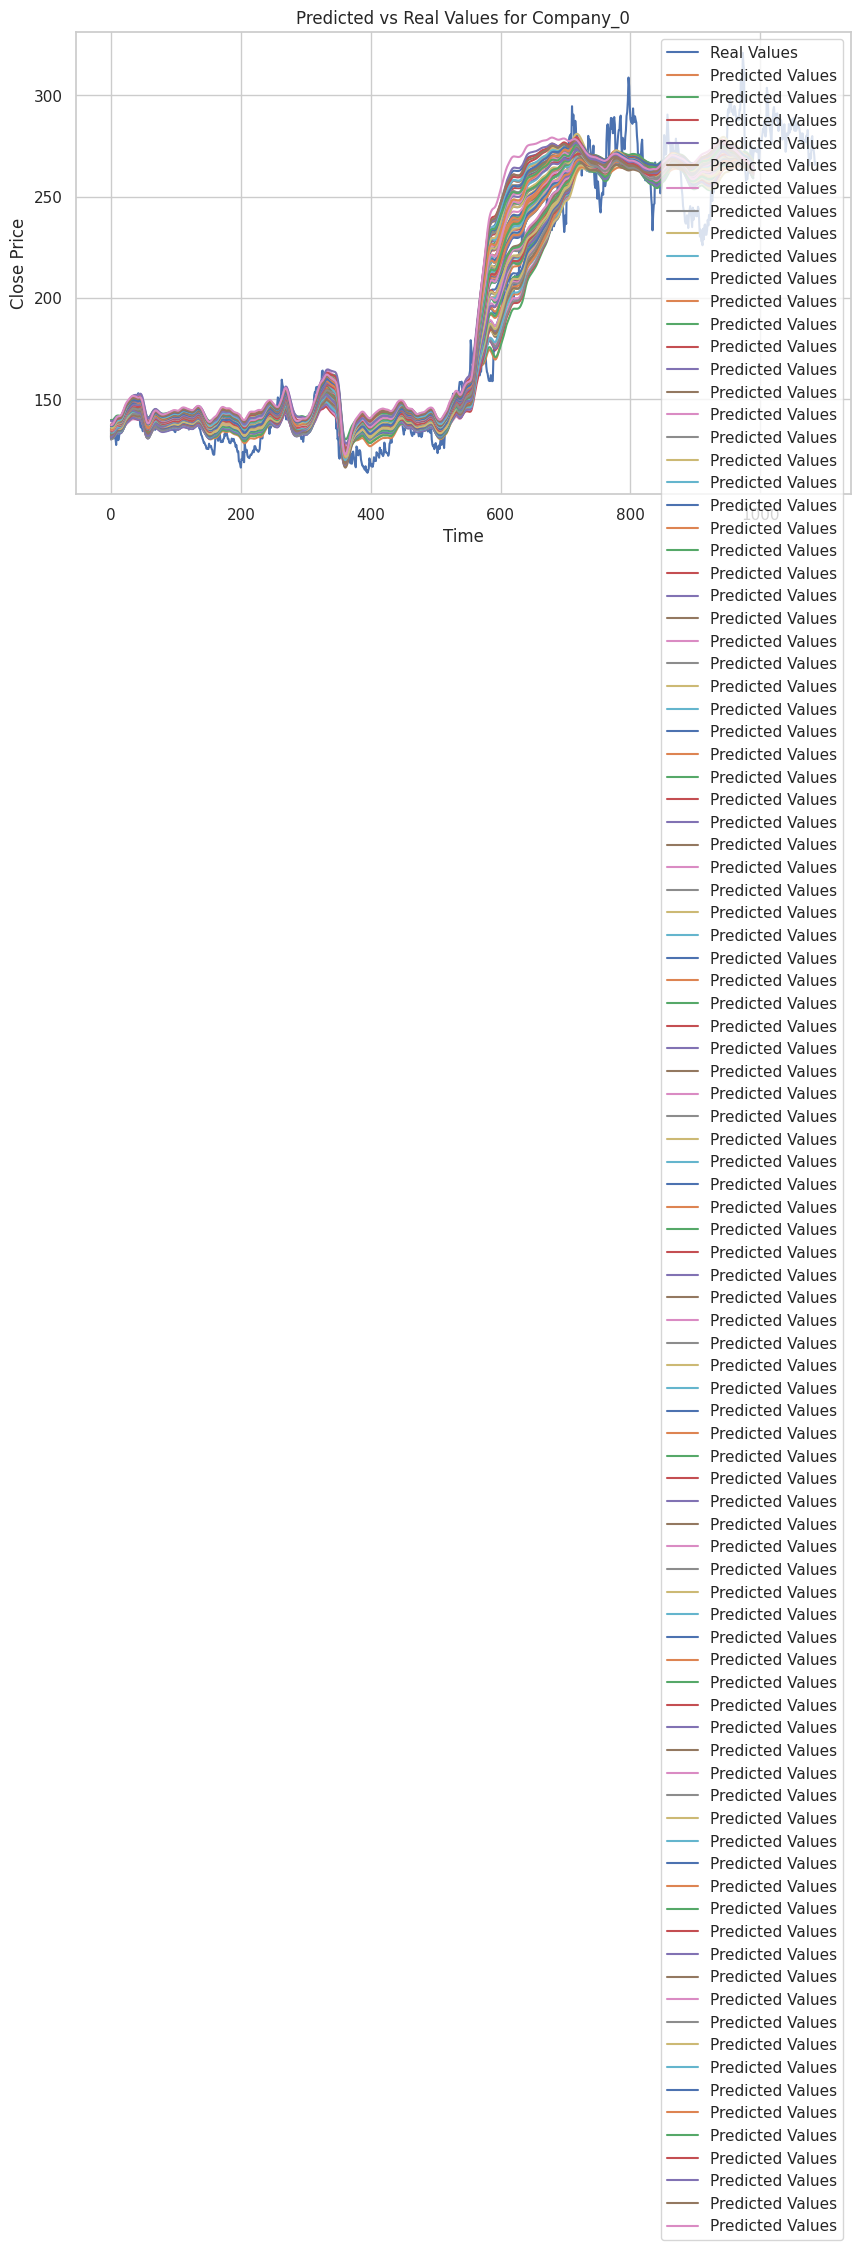

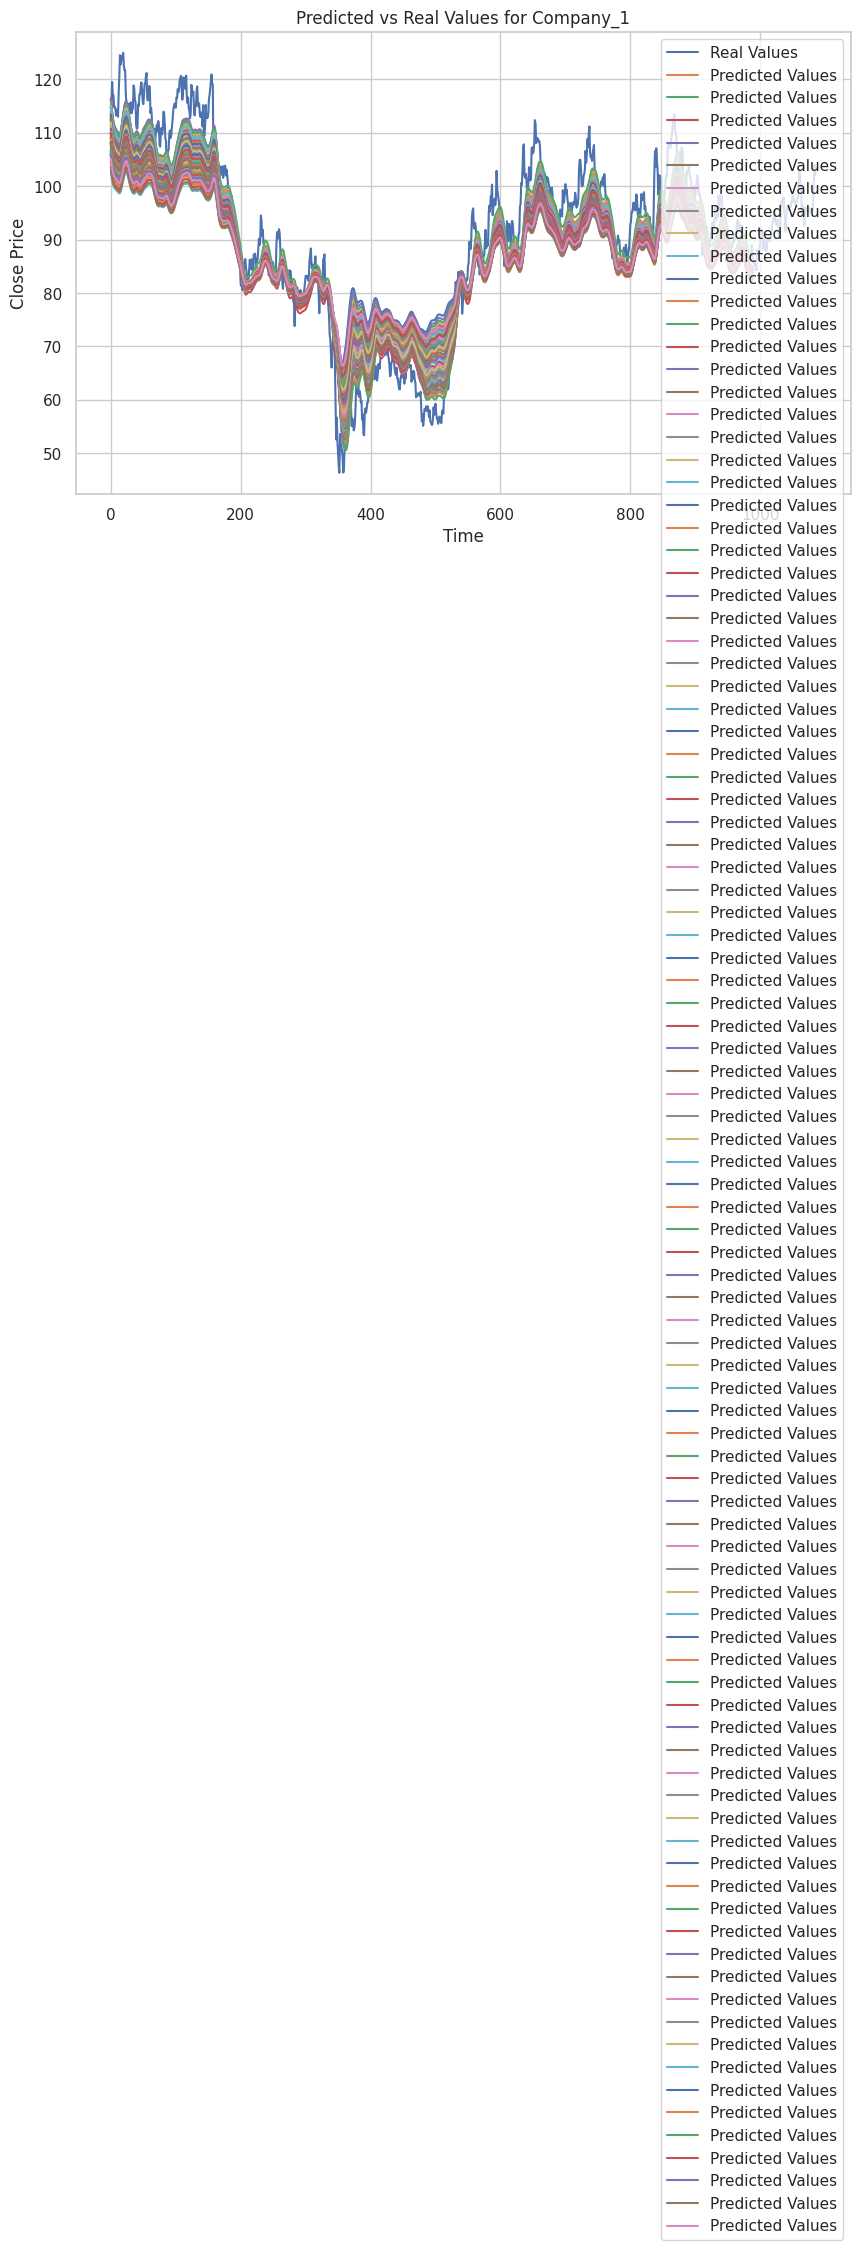

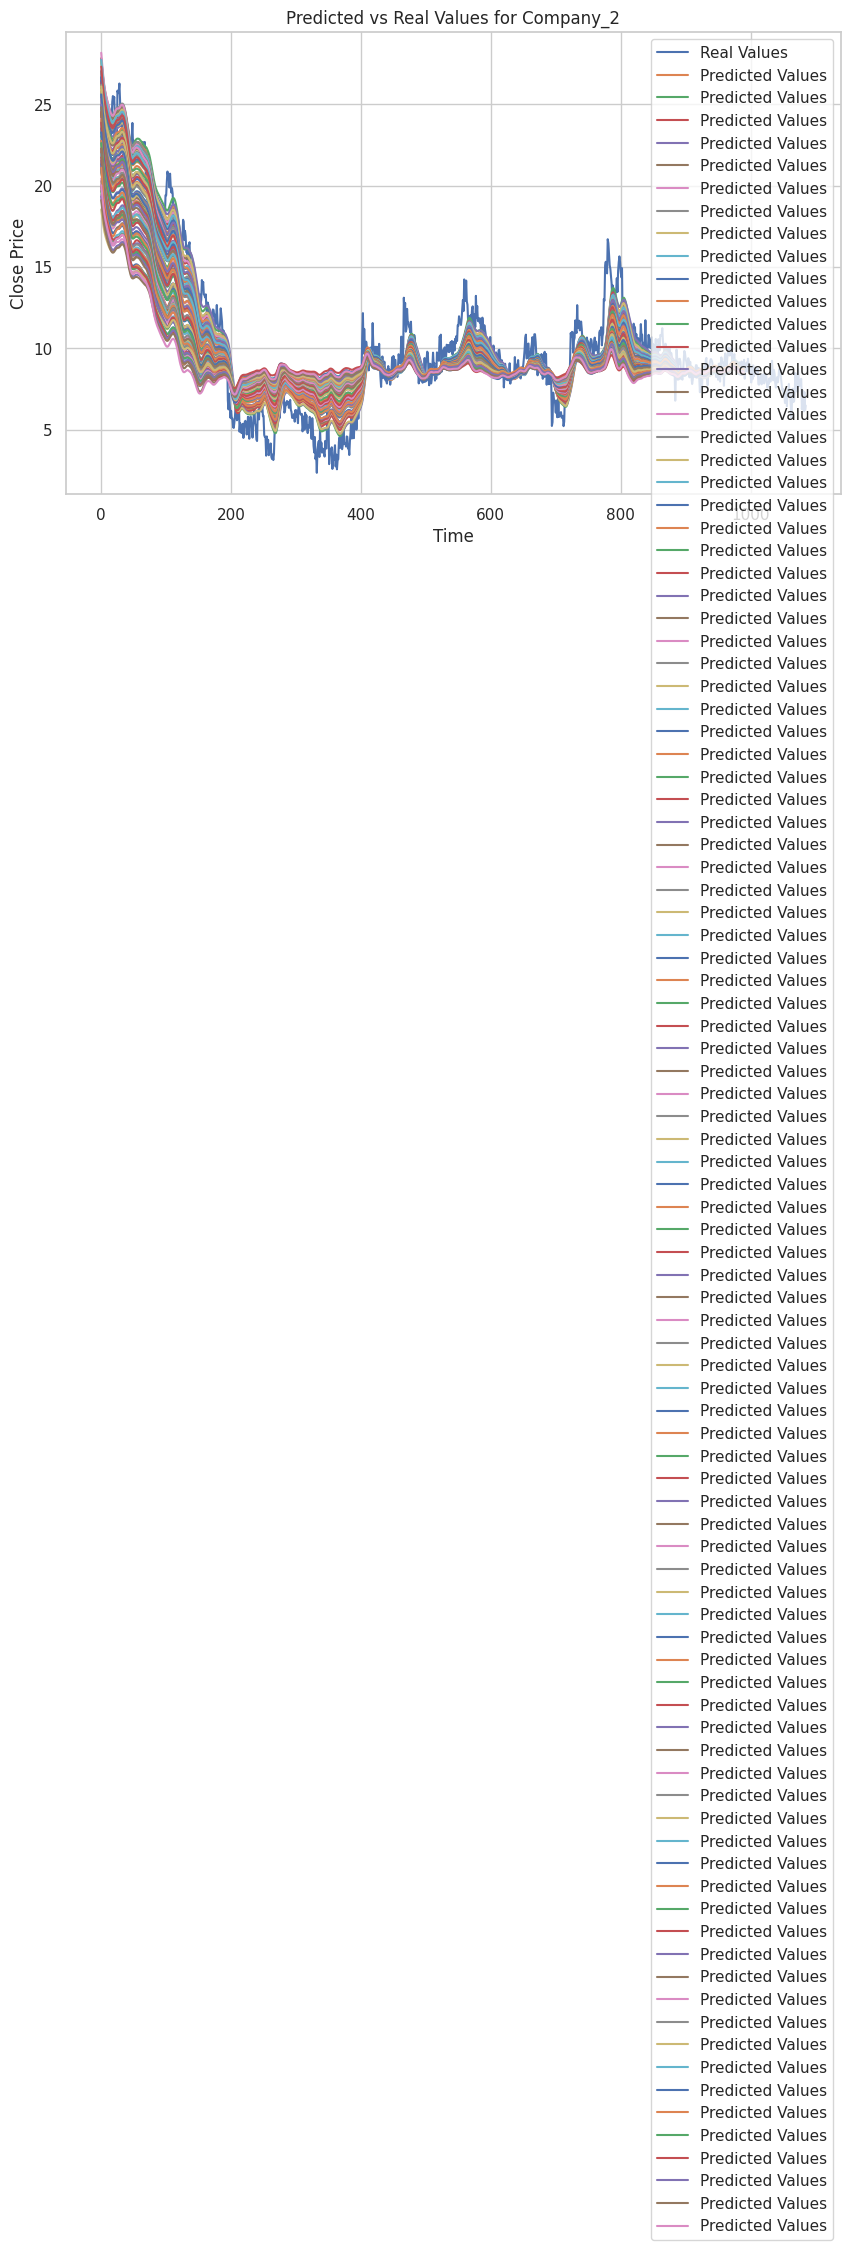

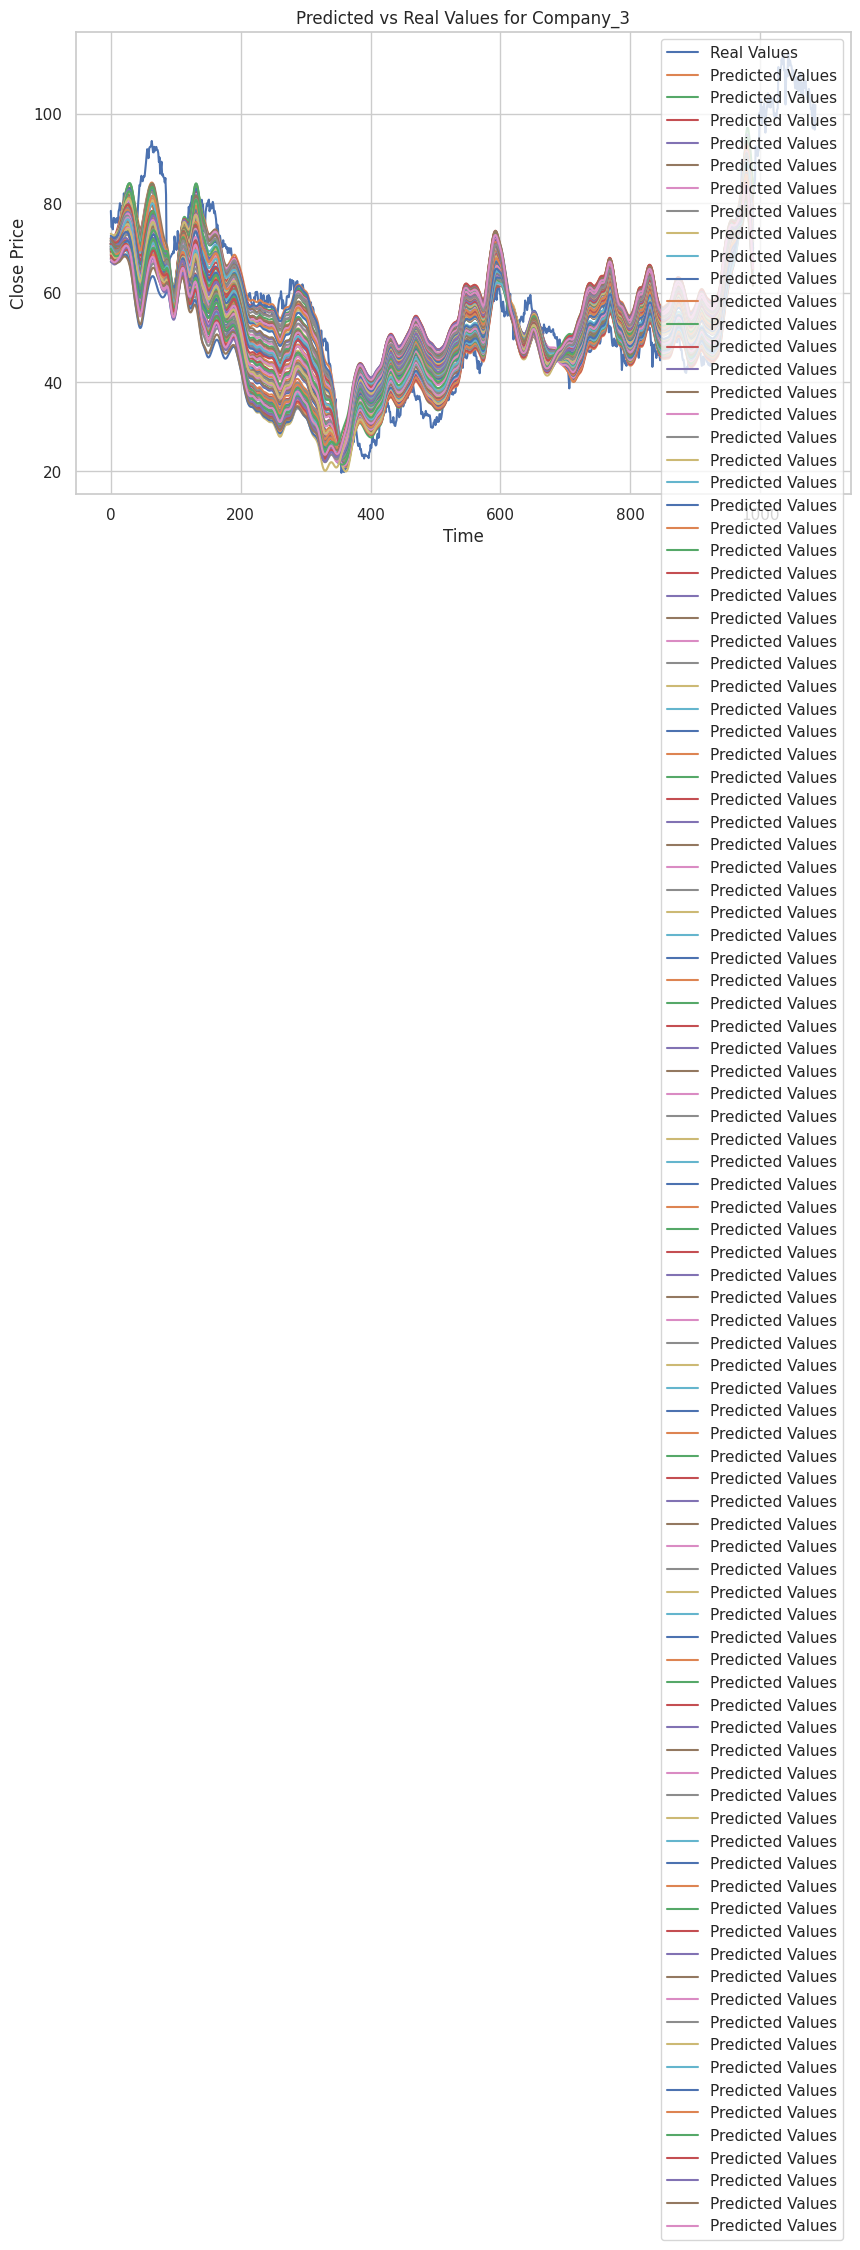

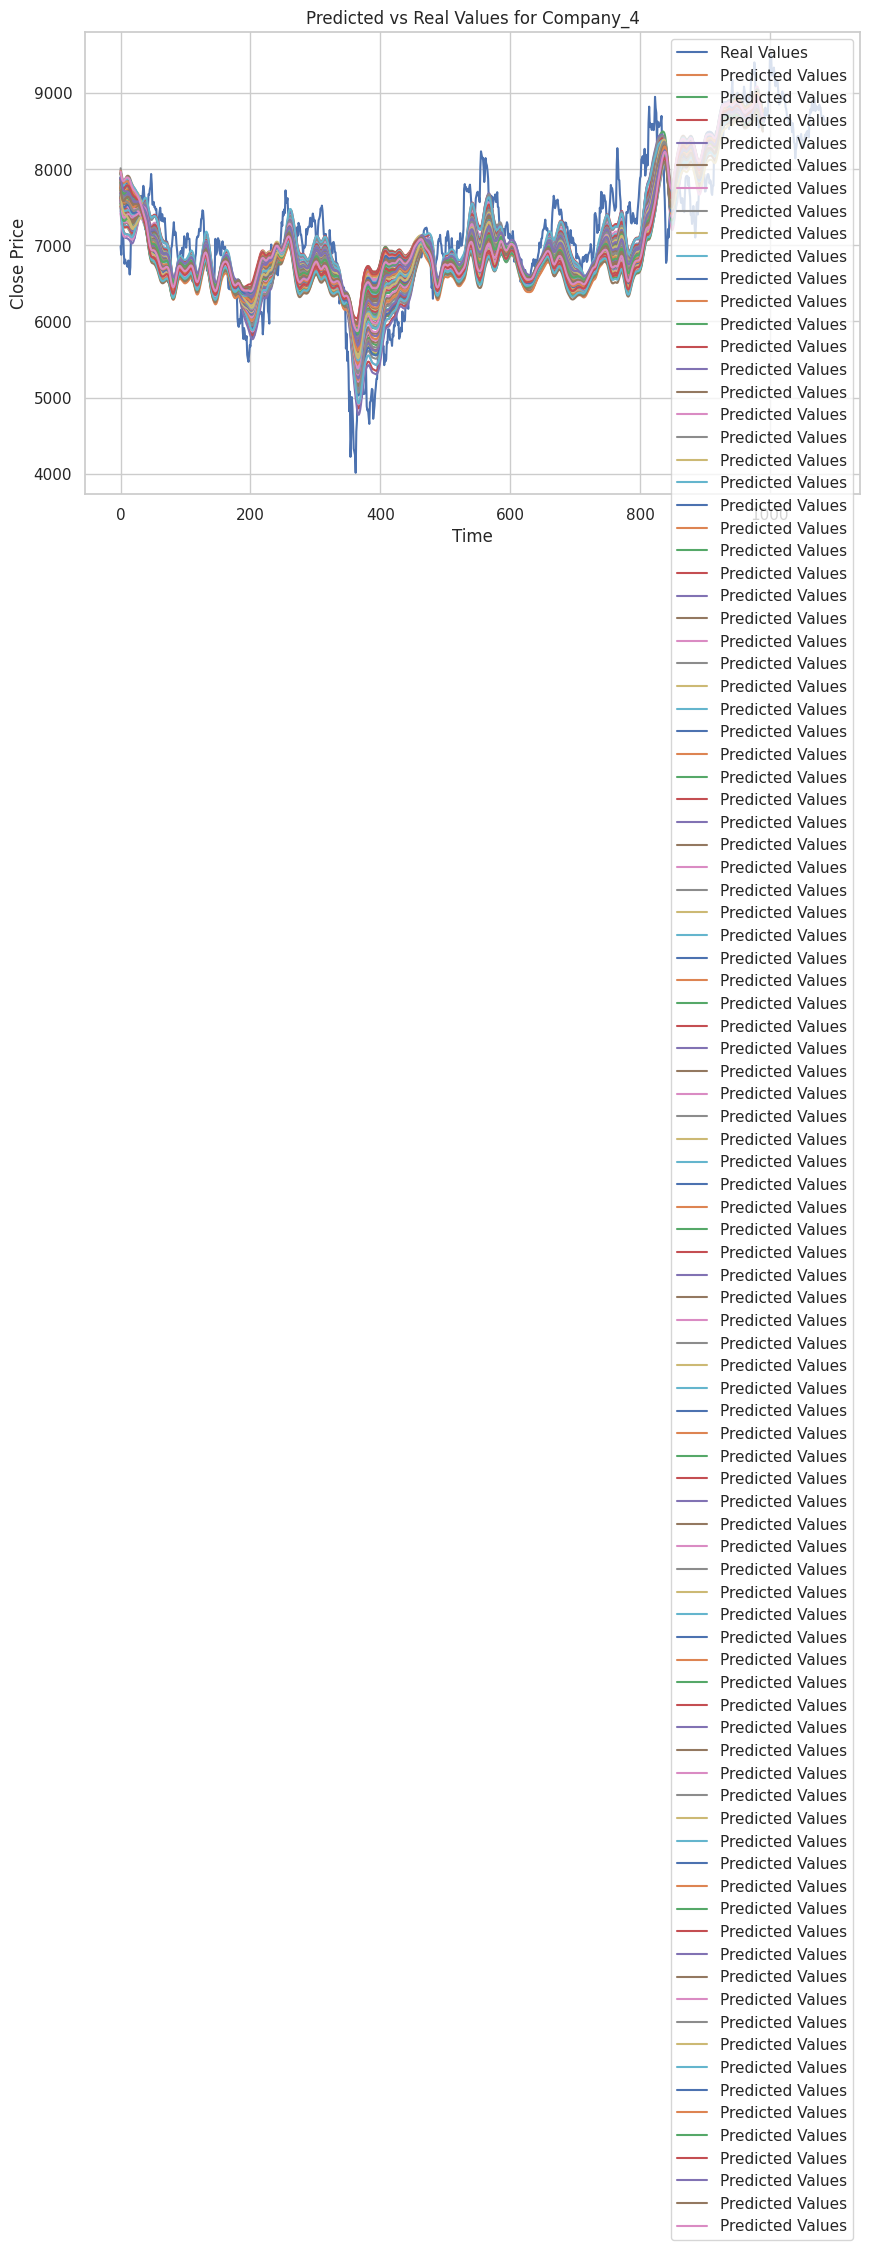

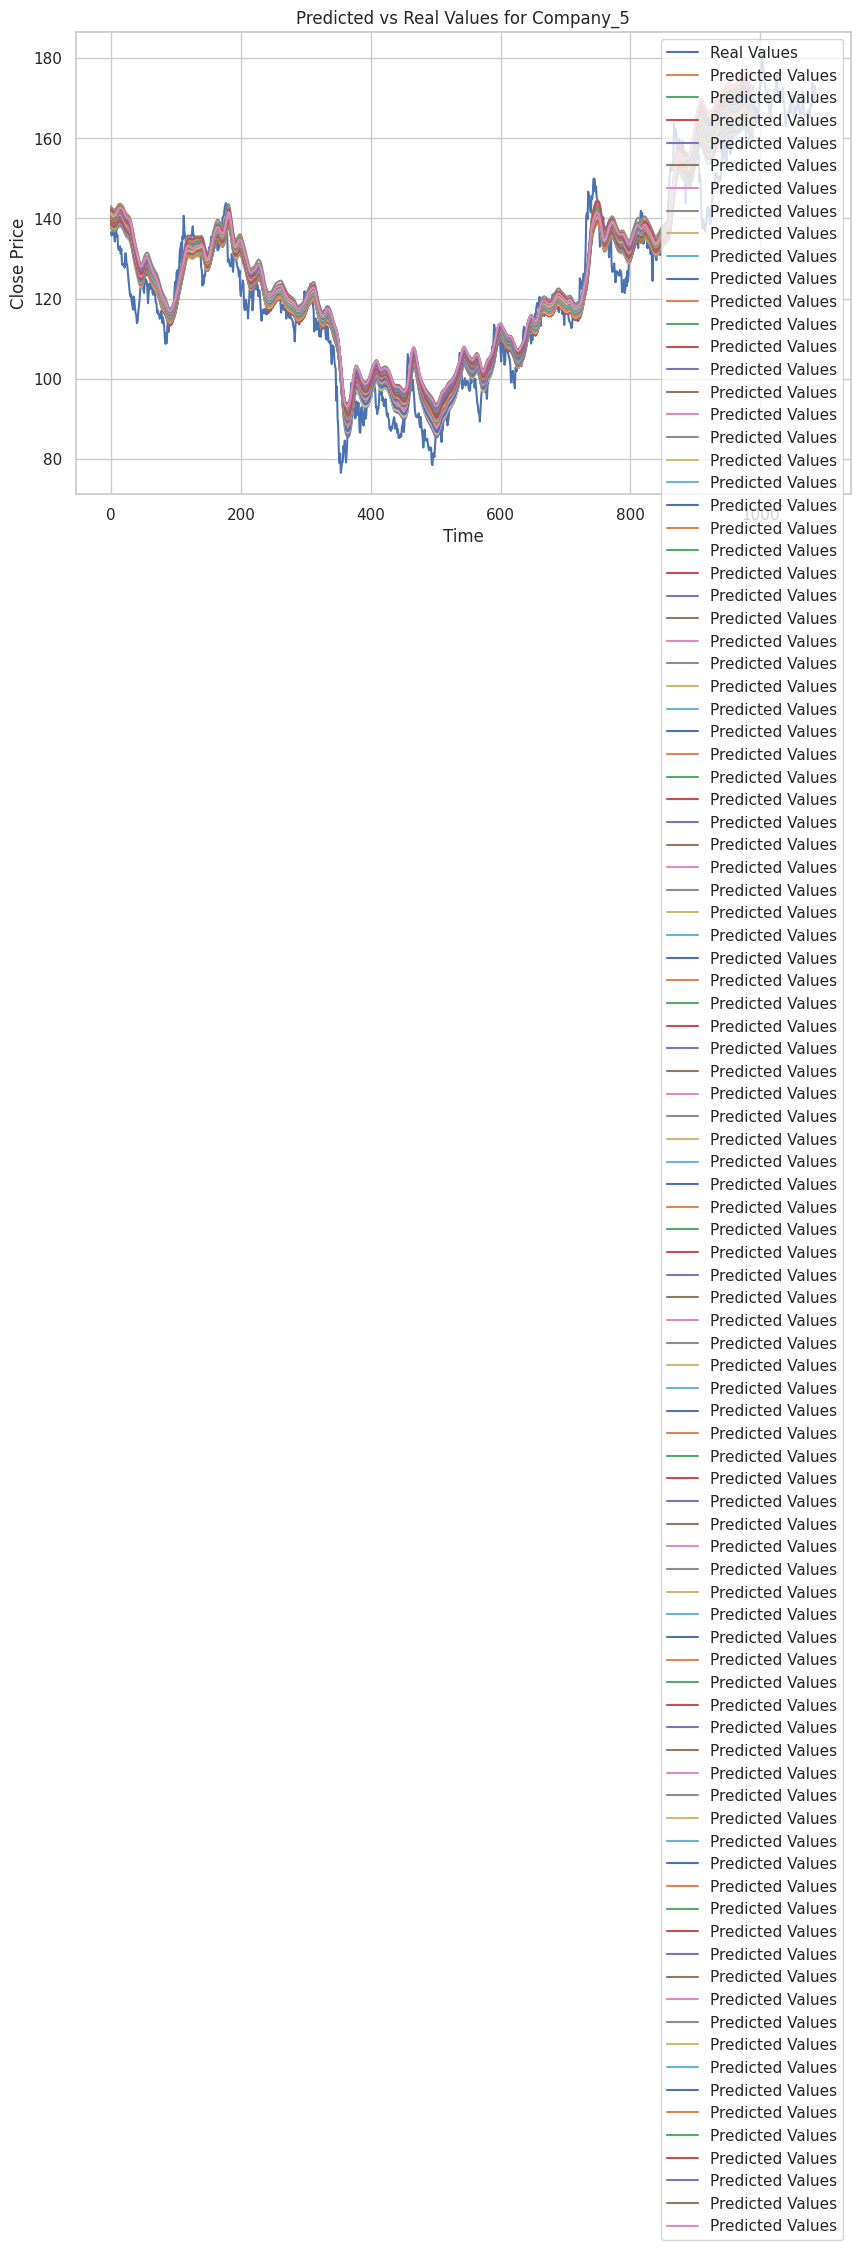

In [22]:
import matplotlib.pyplot as plt
# Plot the predicted values against the real values for each company
for company, predictions_unscaled in company_predictions.items():
    # Get the original close prices for the company
    original_close_prices = company_dfs[company]['Close'].values[n_steps:]

    # Plot the predicted values against the original close prices
    plt.figure(figsize=(10, 6))
    plt.plot(original_close_prices, label='Real Values')
    plt.plot(predictions_unscaled, label='Predicted Values')
    plt.title(f"Predicted vs Real Values for {company}")
    plt.xlabel("Time")
    plt.ylabel("Close Price")
    plt.legend()
    plt.show()


In [23]:
company_dfstest = {}

# Iterate over unique company names
for company in test['Company'].unique():
    # Filter the DataFrame for the current company
    company_data = test[test['Company'] == company]
    
    company_data = company_data.drop(columns=['Company'])
    
    # Store the filtered data in the dictionary
    company_dfstest[company] = company_data

# Now company_dfs contains DataFrames for each company
# You can access the DataFrame for a specific company like this:
# company_dfs["Company1"]

# Example usage:
# Print the first few rows of the DataFrame for Company1
print("Data for Company_0:")
print(company_dfstest["Company_0"].head())

Data for Company_0:
    Id        Date
0    0  2038-03-01
6    6  2038-03-02
12  12  2038-03-03
18  18  2038-03-06
24  24  2038-03-08


In [24]:
# Dictionary to store predictions for each company
company_predictions = {}

# Iterate over each company
for company, train_df in company_dfs.items():
    # Define the number of timesteps (past days data to use for prediction)
    n_steps = 150
    
    # Scale the train data
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_close = train_df['Close'].values.reshape(-1, 1)
#     print(train_close)
    train_close_scaled = scaler.fit_transform(train_close)
    
    # Prepare the training data with timesteps
    model = company_models[company]  
        
    # Prepare test data for prediction
    test_df = company_dfstest[company]
#     print(test_df)
    # Initialize list to store predicted Close values
    predicted_close = []
    
    # Iterate over the test samples
    for i in range(len(test_df)):
        test_sample = []
        
        # For the initial n_steps samples, use the last n_steps samples from the training set and the current samples from the test set
        if i < n_steps:
            for j in range(n_steps):
                if i - n_steps + j < 0:
                    test_sample.append(train_close[-(n_steps - i) + j][0])

                else:
                    test_sample.append(predicted_close[i - n_steps + j] if i - n_steps + j >= 0 else train_close[-(n_steps - i) + j][0])

        else:
            # For subsequent samples, use the last n_steps predicted Close values
            test_sample = predicted_close[-n_steps:]
#             print(test_sample)
        
        test_sample_scaled = scaler.transform(np.array(test_sample).reshape(-1, 1))
#         print(test_sample)
        # Predict Close value for the current sample
        
        prediction = model.predict(test_sample_scaled.reshape(1, n_steps, 1))
        # Reshape prediction to have shape (1, 1)
        prediction_reshaped = prediction.reshape(96, 1)

# Inverse transform the prediction
        prediction_inverse_transformed = scaler.inverse_transform(prediction_reshaped)

# Extract the float value from the inverse transformed result
        predicted_value = prediction_inverse_transformed[0][0]
#         prediction = scaler.inverse_transform([[prediction]])
#         prediction = scaler.inverse_transform(np.array(predicted_close).reshape(-1, 1)).ravel()
        predicted_close = np.append(predicted_close, predicted_value)
#         predicted_close = scaler.inverse_transform(np.array(predicted_close).reshape(-1, 1)).ravel()
        
    # Inverse transform the predicted values
#     predicted_close = scaler.inverse_transform(np.array(predicted_close).reshape(-1, 1)).ravel()    
    # Store the predictions for this company
    company_predictions[company] = np.array(predicted_close)

# Now company_predictions contains the predicted Close values for each company's test set


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

In [25]:
# Initialize a count for the Ids
count = 0
array_0=np.array(company_predictions['Company_0'])
array_1=np.array(company_predictions['Company_1'])
array_2=np.array(company_predictions['Company_2'])
array_3=np.array(company_predictions['Company_3'])
array_4=np.array(company_predictions['Company_4'])
array_5=np.array(company_predictions['Company_5'])
# print((array_4))
# Iterate over each company's predictions
array_master=[]
for i in range(0,96):
    array_master.append(array_0[i])
    array_master.append(array_1[i])
    array_master.append(array_2[i])
    array_master.append(array_3[i])
    array_master.append(array_4[i])
    array_master.append(array_5[i])

# Sort the DataFrame by 'Id'
# print(array_master)
df = pd.DataFrame(array_master, columns=['Close'])

# Add the 'Id' column with index values
df['Id'] = df.index

# Reorder the columns
df = df[['Id', 'Close']]
# print(merged_predictions.head(385))
print(df.head(12))

df.to_csv('/kaggle/working/submission.csv', index = False)


    Id        Close
0    0   259.950256
1    1    93.643654
2    2     7.736430
3    3    75.259285
4    4  8621.574219
5    5   165.091522
6    6   259.856873
7    7    94.211952
8    8     7.636844
9    9    74.707878
10  10  8598.119141
11  11   165.140930
